> #### <strong><font color="7FFF00" size =6>Telecom X</font></strong>

# **Análise de Evasão de Clientes**
 ---

# 📄Relatório Final

## **Apresentação do Projeto: Análise de *Churn* de Clientes na Telecom X**

Olá a todos! Sou o novo assistente de análise de dados na Telecom X e estou muito empolgado em fazer parte do projeto "Churn de Clientes".
A Telecom X tem enfrentado um desafio significativo com um alto índice de cancelamentos de clientes. Para solucionar isso, precisamos urgentemente compreender os fatores que levam à perda de clientes e, assim, desenvolver estratégias eficazes para reter nossa base.
Meu papel nesse projeto será fundamental. Serei responsável por:

*	**Coletar** os dados relevantes.
*	**Tratar** e preparar esses dados, garantindo sua qualidade e consistência.
*	**Analisar** as informações utilizando Python e suas principais bibliotecas (como Pandas, Matplotlib, Seaborn, etc.) para extrair insights valiosos.

Os resultados da minha análise servirão como base sólida para que a equipe de Data Science possa avançar. A partir desses insights, meus colegas poderão desenvolver modelos preditivos e, finalmente, criar e implementar estratégias eficazes para reduzir a evasão de clientes.
Acredito que, com este trabalho, conseguiremos uma compreensão mais profunda do comportamento dos nossos clientes e contribuiremos significativamente para o sucesso da Telecom X.


## **Cronograma de trabalho:**

* 🛠️ Importar e manipular dados de uma API de forma eficiente.
* 🛠️	Aplicar os conceitos de ETL (Extração, Transformação e Carga) na preparação dos dados.
* 🛠️	Criar visualizações de dados estratégicas para identificar padrões e tendências.
* 🛠️	Realizar uma Análise Exploratória de Dados (EDA) e gerar um relatório com insights relevantes.


# 📌 Extração de Dados
(ETL - E: Extract)

---

## **Importar os dados da API da Telecom X.**
Esses dados estão disponíveis no formato JSON e contêm informações essenciais sobre os clientes, incluindo dados demográficos, tipo de serviço contratado e status de evasão.

*	Carregar os dados diretamente da API utilizando Python.
*	Converter os dados para um DataFrame do Pandas para facilitar a manipulação



In [344]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [345]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

In [346]:
dados = pd.read_json(url)

In [347]:
dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


**Observação**: Dados 'aninhados'

Vamos **normalizar** as colunas 'customer', 'phone', 'internet', 'account'

---

In [348]:
dados_customerID = dados['customerID']

In [349]:
dados_Churn = dados['Churn']

In [350]:
customer_nomalizado = pd.json_normalize(dados['customer'])

In [351]:
customer_nomalizado

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
7262,Female,0,No,No,13
7263,Male,0,Yes,No,22
7264,Male,0,No,No,2
7265,Male,0,Yes,Yes,67


In [352]:
phone_normalizado = pd.json_normalize(dados['phone'])

In [353]:
phone_normalizado

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No
...,...,...
7262,Yes,No
7263,Yes,Yes
7264,Yes,No
7265,Yes,No


In [354]:
internet_normalizado = pd.json_normalize(dados['internet'])

In [355]:
internet_normalizado

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...,...
7262,DSL,Yes,No,No,Yes,No,No
7263,Fiber optic,No,No,No,No,No,Yes
7264,DSL,No,Yes,No,No,No,No
7265,DSL,Yes,No,Yes,Yes,No,Yes


In [356]:
account_normalizado = pd.json_normalize(dados['account'])

In [357]:
account_normalizado

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.60,593.3
1,Month-to-month,No,Mailed check,59.90,542.4
2,Month-to-month,Yes,Electronic check,73.90,280.85
3,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...
7262,One year,No,Mailed check,55.15,742.9
7263,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,Month-to-month,Yes,Mailed check,50.30,92.75
7265,Two year,No,Mailed check,67.85,4627.65


Vamos gerar um DF com o **dados extraidos**.

---

In [358]:
dados_extraidos = pd.concat([
    dados_customerID,
    dados_Churn,
    customer_nomalizado,
    phone_normalizado,
    internet_normalizado,
    account_normalizado
], axis=1)

In [359]:
dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [360]:
dados_extraidos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


# 🔧 Transformação
(ETL - T: Transform)

---

**Verificando Inconsistências nos Dados da Telecom X.**

**Verificação da existência de problemas** nos dados que possam afetar a análise. Atenção a valores ausentes, duplicados, erros de formatação e inconsistências nas categorias. Esse processo é essencial para garantir que os dados estejam prontos para as etapas de Carga e Análise.

**Estudo da estrutura do Dataset** e o significado de suas colunas. Essa etapa ajudará a identificar quais variáveis são mais relevantes para a análise de evasão de clientes.
*	Explorar as colunas do dataset e verificar seus tipos de dados.
*	Identificar as colunas mais relevantes para a análise de evasão.

**Tratando as Inconsistências** identificadas aplicando as correções necessárias. Ajuste os dados para garantir que estejam completos e coerentes, preparando-os para as próximas etapas da análise.

**Criação Coluna de Contas Diárias**; após análise e verificação das colunas ‘Contas Mensais’ e ‘Contas Totais’ vê-se necessária a criação de uma coluna para a análise diária de Custos. Para isso usamos o faturamento mensal para calcular o valor diário, proporcionando uma visão mais detalhada do comportamento dos clientes ao longo do tempo.

**Padronização e Transformação de Dados**:
A padronização e transformação de dados é altamente recomendada, pois visa tornar as informações mais consistentes, compreensíveis e adequadas para análise.
Durante essa fase há a conversão de valores textuais como "Sim" e "Não" em valores binários (1 e 0), facilitando o processamento matemático e a aplicação de modelos analíticos.
Além disso, traduzir ou renomear colunas e dados torna os dados mais acessíveis e compreensíveis, especialmente quando se lida com fontes externas ou termos técnicos. Essa etapa pode melhorar significativamente a clareza e a comunicação dos resultados, facilitando a interpretação e evitando confusões, especialmente ao compartilhar informações com stakeholders não técnicos.


* **Checando as Informações dos dados_extraidos**

In [361]:
dados_extraidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


## Salvando os dados em JSON e CSV para futuras analises

In [362]:
dados_extraidos.to_json('dados_extraidos.json')

In [363]:
dados_extraidos.to_csv('dados_extraidos.csv')

## **Alinhamento**

Nossa análise geral deve fazer relação e correlações com a Coluna 'Churn', nosso foco. Vamos olhar mais de perto esta coluna.

In [364]:
dados_extraidos['Churn'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7267 entries, 0 to 7266
Series name: Churn
Non-Null Count  Dtype 
--------------  ----- 
7267 non-null   object
dtypes: object(1)
memory usage: 56.9+ KB


In [365]:
dados_extraidos['Churn'].describe()

,Churn
count,7267
unique,3
top,No
freq,5174


In [366]:
dados_extraidos['Churn'].unique()

array(['No', 'Yes', ''], dtype=object)

In [367]:
# Verificar valores vazios ou strings em branco
print("\n=== VALORES VAZIOS/BRANCOS ===")
for col in dados_extraidos.select_dtypes(include='object').columns:
    empty_count = (dados_extraidos[col] == '').sum()
    whitespace_count = (dados_extraidos[col].str.strip() == '').sum()
    if empty_count > 0 or whitespace_count > 0:
        print(f"{col}: {empty_count} vazios, {whitespace_count} só espaços")


=== VALORES VAZIOS/BRANCOS ===
Churn: 224 vazios, 224 só espaços
Charges.Total: 0 vazios, 11 só espaços


In [368]:
# Verificar linhas duplicadas
print("=== DADOS DUPLICADOS ===")
print(f"Linhas duplicadas: {dados_extraidos.duplicated().sum()}")
print(f"CustomerIDs duplicados: {dados_extraidos['customerID'].duplicated().sum()}")

=== DADOS DUPLICADOS ===
Linhas duplicadas: 0
CustomerIDs duplicados: 0


In [369]:
print("=== INCONSISTÊNCIAS CATEGÓRICAS ===")

# Definir valores esperados para cada coluna categórica
expected_values = {
    'Churn': ['Yes', 'No'],
    'gender': ['Male', 'Female'],
    'Partner': ['Yes', 'No'],
    'Dependents': ['Yes', 'No'],
    'PhoneService': ['Yes', 'No'],
    'MultipleLines': ['Yes', 'No', 'No phone service'],
    'InternetService': ['DSL', 'Fiber optic', 'No'],
    'OnlineSecurity': ['Yes', 'No', 'No internet service'],
    'OnlineBackup': ['Yes', 'No', 'No internet service'],
    'DeviceProtection': ['Yes', 'No', 'No internet service'],
    'TechSupport': ['Yes', 'No', 'No internet service'],
    'StreamingTV': ['Yes', 'No', 'No internet service'],
    'StreamingMovies': ['Yes', 'No', 'No internet service'],
    'Contract': ['Month-to-month', 'One year', 'Two year'],
    'PaperlessBilling': ['Yes', 'No'],
    'PaymentMethod': ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
}

# Verificar inconsistências
for col, expected in expected_values.items():
    if col in dados_extraidos.columns:
        unique_vals = dados_extraidos[col].unique()
        unexpected = set(unique_vals) - set(expected)
        if unexpected:
            print(f"{col}: Valores inesperados -> {unexpected}")

        # Verificar case sensitivity
        unique_lower = [str(v).lower() for v in unique_vals]
        expected_lower = [str(v).lower() for v in expected]
        case_issues = set(unique_lower) - set(expected_lower)
        if case_issues:
            print(f"{col}: Possíveis problemas de case -> {case_issues}")

=== INCONSISTÊNCIAS CATEGÓRICAS ===
Churn: Valores inesperados -> {''}
Churn: Possíveis problemas de case -> {''}


## Problema com as Colunas *Churn* e *Charges.Total*

In [370]:
dados_extraidos['Charges.Total'] = pd.to_numeric(dados_extraidos['Charges.Total'], errors='coerce')

In [371]:
dados_extraidos['Charges.Total'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7267 entries, 0 to 7266
Series name: Charges.Total
Non-Null Count  Dtype  
--------------  -----  
7256 non-null   float64
dtypes: float64(1)
memory usage: 56.9 KB


## Coluna Churn

Estas informções são centrais para nossa análise. e encontramos:

=== VALORES VAZIOS/BRANCOS ===
* Churn: 224 vazios, 224 só espaços
* Charges.Total: 0 vazios, 11 só espaço

## Impacto no seu Projeto:

* **Perda de dados:** ~3% dos dados não poderão ser usados para treinar o modelo
* **Qualidade:** Indica possíveis problemas no processo de coleta/extração dos dados
* **Ação necessária:** Limpeza obrigatória antes de qualquer análise ou modelagem

In [372]:
def limpeza_completa_dados(dados_extraidos):
    """
    Realiza limpeza completa dos dados de Churn

    Args:
        dados_extraidos: DataFrame original com os dados de Churn

    Returns:
        df_limpo: DataFrame limpo e pronto para análise
        relatorio: Dicionário com relatório detalhado da limpeza
    """
    print("=" * 60)
    print("INICIANDO LIMPEZA COMPLETA DOS DADOS")
    print("=" * 60)

    # Criar cópia para não alterar original
    df_limpo = dados_extraidos.copy()

    # Relatório da limpeza
    relatorio = {
        'registros_originais': len(dados_extraidos),
        'colunas_originais': dados_extraidos.shape[1],
        'problemas_encontrados': [],
        'acoes_realizadas': [],
        'registros_removidos': 0,
        'registros_finais': 0
    }

    print(f"📊 Dados originais: {dados_extraidos.shape[0]} registros, {dados_extraidos.shape[1]} colunas")

    # ==========================================
    # 1. LIMPEZA DA VARIÁVEL TARGET (CHURN)
    # ==========================================
    print("\n🎯 1. LIMPEZA DA VARIÁVEL TARGET (CHURN)")

    # Identificar problemas no Churn
    churn_vazios = (df_limpo['Churn'] == '').sum()
    churn_espacos = (df_limpo['Churn'].str.strip() == '').sum()

    if churn_vazios > 0 or churn_espacos > 0:
        print(f"   ⚠️  Problemas encontrados:")
        print(f"      - Churn vazios: {churn_vazios}")
        print(f"      - Churn só espaços: {churn_espacos}")

        relatorio['problemas_encontrados'].append(f"Churn: {churn_vazios} vazios, {churn_espacos} espaços")

        # Remover registros com Churn inválido
        antes = len(df_limpo)
        df_limpo = df_limpo[
            (df_limpo['Churn'] != '') &
            (df_limpo['Churn'].str.strip() != '')
        ].copy()
        removidos = antes - len(df_limpo)
        relatorio['registros_removidos'] += removidos
        relatorio['acoes_realizadas'].append(f"Removidos {removidos} registros com Churn inválido")

        print(f"   ✅ Removidos {removidos} registros com Churn inválido")
    else:
        print("   ✅ Churn: Nenhum problema encontrado")

    # Padronizar valores do Churn
    df_limpo['Churn'] = df_limpo['Churn'].str.strip().str.upper()
    valores_churn = df_limpo['Churn'].unique()
    print(f"   📋 Valores únicos em Churn: {valores_churn}")

    # Verificar se existem valores diferentes de YES/NO
    valores_invalidos = set(valores_churn) - {'YES', 'NO'}
    if valores_invalidos:
        print(f"   ⚠️  Valores inválidos encontrados: {valores_invalidos}")
        relatorio['problemas_encontrados'].append(f"Churn: valores inválidos {valores_invalidos}")
        # Remover registros com valores inválidos
        antes = len(df_limpo)
        df_limpo = df_limpo[df_limpo['Churn'].isin(['YES', 'NO'])].copy()
        removidos = antes - len(df_limpo)
        if removidos > 0:
            relatorio['registros_removidos'] += removidos
            relatorio['acoes_realizadas'].append(f"Removidos {removidos} registros com valores inválidos em Churn")
            print(f"   ✅ Removidos {removidos} registros com valores inválidos")
    else:
        print("   ✅ Todos os valores de Churn são válidos (YES/NO)")

    # ==========================================
    # 2. LIMPEZA DE CHARGES.TOTAL
    # ==========================================
    print("\n💰 2. LIMPEZA DE CHARGES.TOTAL")

    # Verificar tipo atual
    print(f"   📊 Tipo atual: {df_limpo['Charges.Total'].dtype}")

    # Limpar espaços e valores vazios
    df_limpo['Charges.Total'] = df_limpo['Charges.Total'].astype(str).str.strip()
    espacos_total = (df_limpo['Charges.Total'] == '').sum()

    if espacos_total > 0:
        print(f"   ⚠️  {espacos_total} valores só com espaços encontrados")
        relatorio['problemas_encontrados'].append(f"Charges.Total: {espacos_total} valores vazios")

    # Substituir vazios por NaN
    df_limpo['Charges.Total'] = df_limpo['Charges.Total'].replace(['', ' ', 'nan'], pd.NA)

    # Converter para numérico
    df_limpo['Charges.Total'] = pd.to_numeric(df_limpo['Charges.Total'], errors='coerce')
    nan_total = df_limpo['Charges.Total'].isnull().sum()

    if nan_total > 0:
        print(f"   ⚠️  {nan_total} valores não puderam ser convertidos para numérico")

        # Preencher NaN com mediana
        mediana = df_limpo['Charges.Total'].median()
        df_limpo['Charges.Total'].fillna(mediana, inplace=True)

        relatorio['acoes_realizadas'].append(f"Preenchidos {nan_total} NaN em Charges.Total com mediana: {mediana:.2f}")
        print(f"   ✅ NaN preenchidos com mediana: {mediana:.2f}")

    print(f"   ✅ Charges.Total convertido para: {df_limpo['Charges.Total'].dtype}")

    # ==========================================
    # 3. LIMPEZA DE OUTRAS COLUNAS CATEGÓRICAS
    # ==========================================
    print("\n📋 3. LIMPEZA DE COLUNAS CATEGÓRICAS")

    # Colunas categóricas para verificar
    colunas_categoricas = ['gender', 'Partner', 'Dependents', 'PhoneService',
                          'MultipleLines', 'InternetService', 'OnlineSecurity',
                          'OnlineBackup', 'DeviceProtection', 'TechSupport',
                          'StreamingTV', 'StreamingMovies', 'Contract',
                          'PaperlessBilling', 'PaymentMethod']

    for col in colunas_categoricas:
        if col in df_limpo.columns:
            # Limpar espaços
            df_limpo[col] = df_limpo[col].str.strip()

            # Verificar valores vazios
            vazios = (df_limpo[col] == '').sum()
            if vazios > 0:
                print(f"   ⚠️  {col}: {vazios} valores vazios")
                relatorio['problemas_encontrados'].append(f"{col}: {vazios} valores vazios")

                # Para colunas categóricas, substituir por 'Unknown' ou remover
                # Aqui vou remover registros (você pode ajustar conforme necessário)
                antes = len(df_limpo)
                df_limpo = df_limpo[df_limpo[col] != ''].copy()
                removidos = antes - len(df_limpo)
                if removidos > 0:
                    relatorio['registros_removidos'] += removidos
                    relatorio['acoes_realizadas'].append(f"Removidos {removidos} registros com {col} vazio")

    # ==========================================
    # 4. VERIFICAÇÃO DE DUPLICATAS
    # ==========================================
    print("\n🔍 4. VERIFICAÇÃO DE DUPLICATAS")

    # Duplicatas completas
    dup_completas = df_limpo.duplicated().sum()
    if dup_completas > 0:
        print(f"   ⚠️  {dup_completas} linhas completamente duplicadas")
        df_limpo = df_limpo.drop_duplicates().reset_index(drop=True)
        relatorio['registros_removidos'] += dup_completas
        relatorio['acoes_realizadas'].append(f"Removidas {dup_completas} linhas duplicadas")
        print(f"   ✅ Duplicatas removidas")
    else:
        print("   ✅ Nenhuma linha duplicada encontrada")

    # Duplicatas de customerID
    dup_id = df_limpo['customerID'].duplicated().sum()
    if dup_id > 0:
        print(f"   ⚠️  {dup_id} customerIDs duplicados")
        relatorio['problemas_encontrados'].append(f"CustomerID: {dup_id} duplicados")

        # Manter apenas a primeira ocorrência
        df_limpo = df_limpo.drop_duplicates(subset=['customerID'], keep='first').reset_index(drop=True)
        relatorio['registros_removidos'] += dup_id
        relatorio['acoes_realizadas'].append(f"Removidos {dup_id} customerIDs duplicados")
        print(f"   ✅ CustomerIDs duplicados removidos")
    else:
        print("   ✅ Nenhum customerID duplicado")

    # ==========================================
    # 5. VALIDAÇÕES FINAIS
    # ==========================================
    print("\n✅ 5. VALIDAÇÕES FINAIS")

    # Verificar consistência
    problemas_finais = []

    # SeniorCitizen deve ser 0 ou 1
    senior_invalidos = df_limpo[~df_limpo['SeniorCitizen'].isin([0, 1])].shape[0]
    if senior_invalidos > 0:
        problemas_finais.append(f"SeniorCitizen: {senior_invalidos} valores inválidos")

    # Tenure deve ser >= 0
    tenure_invalidos = df_limpo[df_limpo['tenure'] < 0].shape[0]
    if tenure_invalidos > 0:
        problemas_finais.append(f"tenure: {tenure_invalidos} valores negativos")

    # Charges.Monthly deve ser > 0
    monthly_invalidos = df_limpo[df_limpo['Charges.Monthly'] <= 0].shape[0]
    if monthly_invalidos > 0:
        problemas_finais.append(f"Charges.Monthly: {monthly_invalidos} valores <= 0")

    if problemas_finais:
        print(f"   ⚠️  Problemas adicionais encontrados:")
        for problema in problemas_finais:
            print(f"      - {problema}")
        relatorio['problemas_encontrados'].extend(problemas_finais)
    else:
        print("   ✅ Todas as validações passaram")

    # ==========================================
    # 6. RELATÓRIO FINAL
    # ==========================================
    relatorio['registros_finais'] = len(df_limpo)
    taxa_perda = (relatorio['registros_removidos'] / relatorio['registros_originais']) * 100

    print("\n" + "=" * 60)
    print("RELATÓRIO FINAL DA LIMPEZA")
    print("=" * 60)
    print(f"📊 Registros originais: {relatorio['registros_originais']:,}")
    print(f"📊 Registros finais: {relatorio['registros_finais']:,}")
    print(f"📊 Registros removidos: {relatorio['registros_removidos']:,}")
    print(f"📊 Taxa de perda: {taxa_perda:.1f}%")
    print(f"📊 Shape final: {df_limpo.shape}")

    print(f"\n🔧 Ações realizadas:")
    for acao in relatorio['acoes_realizadas']:
        print(f"   • {acao}")

    if relatorio['problemas_encontrados']:
        print(f"\n⚠️  Problemas encontrados:")
        for problema in relatorio['problemas_encontrados']:
            print(f"   • {problema}")

    # Resetar índices
    df_limpo = df_limpo.reset_index(drop=True)

    return df_limpo, relatorio

def validar_dados_limpos(dados_limpos):
    """
    Valida se os dados estão prontos para análise

    Args:
        dados_limpos: DataFrame após limpeza

    Returns:
        bool: True se todas as validações passaram
    """
    print("\n🔍 VALIDAÇÃO DOS DADOS LIMPOS")
    print("-" * 40)

    validacoes = {
        'sem_nulos_churn': dados_limpos['Churn'].isnull().sum() == 0,
        'churn_valores_validos': set(dados_limpos['Churn'].unique()).issubset({'YES', 'NO'}),
        'charges_total_numerico': dados_limpos['Charges.Total'].dtype in ['float64', 'int64'],
        'sem_duplicatas_id': dados_limpos['customerID'].duplicated().sum() == 0,
        'sem_valores_vazios': dados_limpos.select_dtypes(include='object').apply(lambda x: (x == '').sum()).sum() == 0
    }

    todas_passaram = all(validacoes.values())

    for teste, passou in validacoes.items():
        status = "✅" if passou else "❌"
        print(f"   {status} {teste}")

    if todas_passaram:
        print("\n🎉 DADOS PRONTOS PARA ANÁLISE!")
    else:
        print("\n⚠️  Alguns problemas ainda existem")

    return todas_passaram

# Exemplo de uso:
if __name__ == "__main__":
    # dados_limpos, relatorio = limpeza_completa_dados(dados_extraidos)
    # validacao_ok = validar_dados_limpos(dados_limpos)

    # # Salvar dados limpos
    # dados_limpos.to_csv('dados_churn_limpos.csv', index=False)
    # print(f"\n💾 Dados limpos salvos em 'dados_churn_limpos.csv'")

    pass

In [373]:
df_limpo, relatorio = limpeza_completa_dados(dados_extraidos)

INICIANDO LIMPEZA COMPLETA DOS DADOS
📊 Dados originais: 7267 registros, 21 colunas

🎯 1. LIMPEZA DA VARIÁVEL TARGET (CHURN)
   ⚠️  Problemas encontrados:
      - Churn vazios: 224
      - Churn só espaços: 224
   ✅ Removidos 224 registros com Churn inválido
   📋 Valores únicos em Churn: ['NO' 'YES']
   ✅ Todos os valores de Churn são válidos (YES/NO)

💰 2. LIMPEZA DE CHARGES.TOTAL
   📊 Tipo atual: float64
   ⚠️  11 valores não puderam ser convertidos para numérico
   ✅ NaN preenchidos com mediana: 1397.47
   ✅ Charges.Total convertido para: float64

📋 3. LIMPEZA DE COLUNAS CATEGÓRICAS


/tmp/ipython-input-372-3534693854.py:110: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpo['Charges.Total'].fillna(mediana, inplace=True)



🔍 4. VERIFICAÇÃO DE DUPLICATAS
   ✅ Nenhuma linha duplicada encontrada
   ✅ Nenhum customerID duplicado

✅ 5. VALIDAÇÕES FINAIS
   ✅ Todas as validações passaram

RELATÓRIO FINAL DA LIMPEZA
📊 Registros originais: 7,267
📊 Registros finais: 7,043
📊 Registros removidos: 224
📊 Taxa de perda: 3.1%
📊 Shape final: (7043, 21)

🔧 Ações realizadas:
   • Removidos 224 registros com Churn inválido
   • Preenchidos 11 NaN em Charges.Total com mediana: 1397.47

⚠️  Problemas encontrados:
   • Churn: 224 vazios, 224 espaços


In [374]:
df_limpo

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,NO,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,NO,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,YES,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,YES,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,YES,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,NO,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7039,9992-RRAMN,YES,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7040,9992-UJOEL,NO,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7041,9993-LHIEB,NO,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [375]:
df_limpo.to_csv('dados_churn_limpos.csv', index=False)

In [376]:
pd.read_csv('dados_churn_limpos.csv')

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,NO,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,NO,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,YES,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,YES,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,YES,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,NO,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7039,9992-RRAMN,YES,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7040,9992-UJOEL,NO,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7041,9993-LHIEB,NO,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


Observação: **Ajustando varial DF**

In [377]:
df_dados = df_limpo

In [378]:
df_dados

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,NO,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,NO,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,YES,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,YES,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,YES,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,NO,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7039,9992-RRAMN,YES,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7040,9992-UJOEL,NO,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7041,9993-LHIEB,NO,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


##🛠️ Inserção da Coluna 'Charges.Daily'

---

In [379]:
# 1. Calcule a nova coluna usando .loc para atribuir diretamente ao DataFrame
# Usamos .loc[:, 'Charges.Daily'] para indicar que estamos atribuindo
# a todas as linhas da nova coluna 'Charges.Daily'.
df_dados.loc[:, 'Charges.Daily'] = (df_dados['Charges.Monthly'] / 30).astype('float64')

# 2. Reordene as colunas (o mesmo código que você já tinha)
cols = df_dados.columns.tolist()
payment_method_index = cols.index('PaymentMethod')

# Remove 'Charges.Daily' da posição atual (final) antes de inseri-la novamente
# para evitar duplicidade caso já exista.
if 'Charges.Daily' in cols:
    cols.remove('Charges.Daily')

# Insere 'Charges.Daily' após 'PaymentMethod'
cols.insert(payment_method_index + 1, 'Charges.Daily')

# Reordena o DataFrame
df_dados = df_dados[cols]

df_dados.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Daily,Charges.Monthly,Charges.Total
0,0002-ORFBO,NO,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.186667,65.6,593.30
1,0003-MKNFE,NO,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,1.996667,59.9,542.40
2,0004-TLHLJ,YES,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.463333,73.9,280.85
3,0011-IGKFF,YES,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.266667,98.0,1237.85
4,0013-EXCHZ,YES,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.796667,83.9,267.40


In [380]:
df_dados

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Daily,Charges.Monthly,Charges.Total
0,0002-ORFBO,NO,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.186667,65.60,593.30
1,0003-MKNFE,NO,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,1.996667,59.90,542.40
2,0004-TLHLJ,YES,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.463333,73.90,280.85
3,0011-IGKFF,YES,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.266667,98.00,1237.85
4,0013-EXCHZ,YES,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.796667,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,NO,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,1.838333,55.15,742.90
7039,9992-RRAMN,YES,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,2.836667,85.10,1873.70
7040,9992-UJOEL,NO,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,1.676667,50.30,92.75
7041,9993-LHIEB,NO,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,2.261667,67.85,4627.65


In [381]:
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


##🛠️ Padronização de Colunas Categóricas

---

In [382]:
# Lista de colunas com valores sim/não
colunas_binarias = [
    'Churn', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'PaperlessBilling', 'OnlineSecurity', 'OnlineBackup'
]

# Cópia do DataFrame original
df_dados_padrao = df_dados.copy()

# Padronização para minúsculas + substituição + conversão para tipo inteiro que aceita NaN
for coluna in colunas_binarias:
    df_dados_padrao[coluna] = (
        df_dados_padrao[coluna]
        .astype(str)
        .str.lower()
        .map({'yes': 1, 'no': 0})
        .astype(pd.Int64Dtype())  # Tipo que aceita NA
    )


In [383]:
df_dados_padrao.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Daily,Charges.Monthly,Charges.Total
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,2.186667,65.6,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,1.996667,59.9,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,2.463333,73.9,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,3.266667,98.0,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,2.796667,83.9,267.40


In [384]:
df_dados_padrao

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Daily,Charges.Monthly,Charges.Total
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,2.186667,65.60,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,1.996667,59.90,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,2.463333,73.90,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,3.266667,98.00,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,2.796667,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,1,0,0,One year,0,Mailed check,1.838333,55.15,742.90
7039,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,2.836667,85.10,1873.70
7040,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,1.676667,50.30,92.75
7041,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,1,1,0,1,Two year,0,Mailed check,2.261667,67.85,4627.65


In [385]:
# Ver quantos <NA> por coluna
print(df_dados_padrao[colunas_binarias].isna().sum())

# Ver as linhas específicas com dados ausentes
print(df_dados_padrao[df_dados_padrao[colunas_binarias].isna().any(axis=1)])

Churn                  0
Partner                0
Dependents             0
PhoneService           0
MultipleLines        682
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
PaperlessBilling       0
OnlineSecurity      1526
OnlineBackup        1526
dtype: int64
      customerID  Churn  gender  SeniorCitizen  Partner  Dependents  tenure  \
10    0017-DINOC      0    Male              0        0           0      54   
14    0019-GFNTW      0  Female              0        0           0      56   
16    0020-JDNXP      0  Female              0        1           1      34   
19    0023-HGHWL      1    Male              1        0           0       1   
20    0023-UYUPN      0  Female              1        1           0      50   
...          ...    ...     ...            ...      ...         ...     ...   
7028  9972-EWRJS      0  Female              0        1           1      67   
7032  9975-GPKZU      0    Male              0        1

## **Valores NaN (<NA>)**

Encontramos valores NaN nas colunas:

* MultipleLines        682
* DeviceProtection    1526
* TechSupport         1526
* StreamingTV         1526
* StreamingMovies     1526
* OnlineSecurity      1526
* OnlineBackup        1526

Estas colunas são os SERVIÇOS ofertados pela **TELECOM X** por isso iremos adotar que o cliente que tem estes valores em suas linhas será indicado como '0' para não incidir em 'peso para análise' já que essa informação e derivada de outras.

✅ 1. Preencher valores ausentes com um valor padrão (ex: 0 ou outro)
Se faz sentido na sua análise considerar que onde está nulo é como se fosse “não”, você pode preencher com 0:

In [386]:
df_dados_padrao[colunas_binarias] = df_dados_padrao[colunas_binarias].fillna(0).astype('int64')


In [387]:
df_dados_padrao

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Daily,Charges.Monthly,Charges.Total
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,2.186667,65.60,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,1.996667,59.90,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,2.463333,73.90,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,3.266667,98.00,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,2.796667,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,1,0,0,One year,0,Mailed check,1.838333,55.15,742.90
7039,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,2.836667,85.10,1873.70
7040,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,1.676667,50.30,92.75
7041,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,1,1,0,1,Two year,0,Mailed check,2.261667,67.85,4627.65


In [388]:
df_dados_padrao

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Daily,Charges.Monthly,Charges.Total
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,2.186667,65.60,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,1.996667,59.90,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,2.463333,73.90,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,3.266667,98.00,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,2.796667,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,1,0,0,One year,0,Mailed check,1.838333,55.15,742.90
7039,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,2.836667,85.10,1873.70
7040,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,1.676667,50.30,92.75
7041,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,1,1,0,1,Two year,0,Mailed check,2.261667,67.85,4627.65


**Observação: Outras PADRONIZAÇÕES serão realizadas na próxima fase, por conveniência dos dados.**

# 📊 Carga e Análise
(ETL - L: Load & Analysis)

---

## Análise Descritiva

Inicialmente realizamos uma análise descritiva dos dados, calculando métricas como média, mediana, desvio padrão, e outras medidas que ajudem a entender melhor a distribuição e comportamento dos clientes.

**Distribuição da Evasão**

O objetivo é entender como a variável "churn" (evasão) está distribuída entre os clientes. Utilizamos gráficos para visualizar a proporção de clientes que permaneceram e os que saíram.

**Contagem de Evasão por Variáveis Categóricas**

Exploração de como a evasão se distribui de acordo com variáveis categóricas, como gênero, tipo de contrato, método de pagamento, entre outras.
Essa análise pode revelar padrões interessantes, como, por exemplo, se clientes de determinados perfis têm maior tendência a cancelar o serviço, o que ajudará a direcionar ações estratégicas.

**Contagem de Evasão por Variáveis Numéricas**

Exploração de como variáveis numéricas, como "total gasto" ou "tempo de contrato", se distribuem entre clientes que cancelaram (evasão) e os que não cancelaram.
Essa análise ajuda a entender se certos valores numéricos estão mais associados à evasão, oferecendo insights sobre os fatores que influenciam o comportamento dos clientes.

**Análise de Correlação entre Variáveis**

Explorando a correlação entre diferentes variáveis do Dataset. Isso pode ajudar a identificar quais fatores têm maior relação com a evasão de clientes, como:
•	Como cada uma das variáveis se correlacionam com o Churn

*Usando a função corr() da Biblioteca Pandas*

Como funciona a **corr()**

Quando você aplica .corr() em um DataFrame, o Pandas retorna uma matriz de correlação. Nessa matriz:

*	As linhas e colunas representam as variáveis (colunas) do seu DataFrame.
*	Cada célula da matriz mostra o coeficiente de correlação entre a variável da linha e a variável da coluna correspondente.

**Tipos de Coeficientes de Correlação**

Por padrão, a corr() calcula o coeficiente de correlação de Pearson, que é o mais comum e mede a relação linear entre duas variáveis. O valor varia de -1 a 1:
*	1: Correlação positiva perfeita (as variáveis aumentam ou diminuem juntas).
*	-1: Correlação negativa perfeita (quando uma variável aumenta, a outra diminui na mesma proporção).
*	0: Nenhuma correlação linear.

---


Para começar, realize uma análise descritiva dos dados, calculando métricas como média, mediana, desvio padrão, e outras medidas que ajudem a entender melhor a distribuição e comportamento dos clientes.

✅ Colunas que permitem análise descritiva Você pode aplicar média, mediana, desvio padrão, mínimo, máximo e quartis a todas as colunas numéricas — ou seja, colunas com tipo int64 ou float64.

🔢 Colunas numéricas para análise descritiva:


| Coluna             | Tipo    | Tipo de variável   | Descrição rápida                      |
| ------------------ | ------- | ------------------ | ------------------------------------- |
| `Churn`            | int64   | Binária            | Cliente cancelou (1=Sim, 0=Não)       |
| `SeniorCitizen`    | int64   | Binária            | Idoso (1=Sim, 0=Não)                  |
| `Partner`          | int64   | Binária            | Tem parceiro(a)                       |
| `Dependents`       | int64   | Binária            | Tem dependentes                       |
| `tenure`           | int64   | Contínua (inteira) | Meses de relacionamento com a empresa |
| `PhoneService`     | int64   | Binária            | Usa telefone                          |
| `MultipleLines`    | int64   | Binária            | Tem múltiplas linhas                  |
| `OnlineSecurity`   | int64   | Binária            | Tem segurança online                  |
| `OnlineBackup`     | int64   | Binária            | Usa backup online                     |
| `DeviceProtection` | int64   | Binária            | Tem proteção de dispositivo           |
| `TechSupport`      | int64   | Binária            | Tem suporte técnico                   |
| `StreamingTV`      | int64   | Binária            | Usa streaming de TV                   |
| `StreamingMovies`  | int64   | Binária            | Usa streaming de filmes               |
| `PaperlessBilling` | int64   | Binária            | Usa fatura digital                    |
| `Charges.Daily`    | float64 | Contínua           | Gasto diário                          |
| `Charges.Monthly`  | float64 | Contínua           | Gasto mensal                          |
| `Charges.Total`    | float64 | Contínua           | Gasto total acumulado                 |

🔸 As colunas customerID, gender, InternetService, Contract, e PaymentMethod são categóricas ou alfanuméricas e não são incluídas em análise descritiva numérica direta.

## 🧮 Análise descritiva com Pandas

df_dados_padrao.describe()

Isso já traz:

* count (quantidade)

* mean (média)

* std (desvio padrão)

* min, 25%, 50%, 75%, max (medidas de dispersão e posição)

In [389]:
coluna = 'Charges.Daily'
print("Média:", df_dados_padrao[coluna].mean())
print("Mediana:", df_dados_padrao[coluna].median())
print("Desvio padrão:", df_dados_padrao[coluna].std())
print("Mínimo:", df_dados_padrao[coluna].min())
print("Máximo:", df_dados_padrao[coluna].max())
print("Valores únicos:", df_dados_padrao[coluna].nunique())

Média: 2.1587230820199723
Mediana: 2.3449999999999998
Desvio padrão: 1.0030015699226154
Mínimo: 0.6083333333333333
Máximo: 3.9583333333333335
Valores únicos: 1585


In [390]:
coluna = 'Charges.Monthly'
print("Média:", df_dados_padrao[coluna].mean())
print("Mediana:", df_dados_padrao[coluna].median())
print("Desvio padrão:", df_dados_padrao[coluna].std())
print("Mínimo:", df_dados_padrao[coluna].min())
print("Máximo:", df_dados_padrao[coluna].max())
print("Valores únicos:", df_dados_padrao[coluna].nunique())

Média: 64.76169246059918
Mediana: 70.35
Desvio padrão: 30.09004709767855
Mínimo: 18.25
Máximo: 118.75
Valores únicos: 1585


In [391]:
coluna = 'Charges.Total'
print("Média:", df_dados_padrao[coluna].mean())
print("Mediana:", df_dados_padrao[coluna].median())
print("Desvio padrão:", df_dados_padrao[coluna].std())
print("Mínimo:", df_dados_padrao[coluna].min())
print("Máximo:", df_dados_padrao[coluna].max())
print("Valores únicos:", df_dados_padrao[coluna].nunique())

Média: 2281.9169281556156
Mediana: 1397.475
Desvio padrão: 2265.270398482187
Mínimo: 18.8
Máximo: 8684.8
Valores únicos: 6531


Gerando Histograma para Charges.Daily...


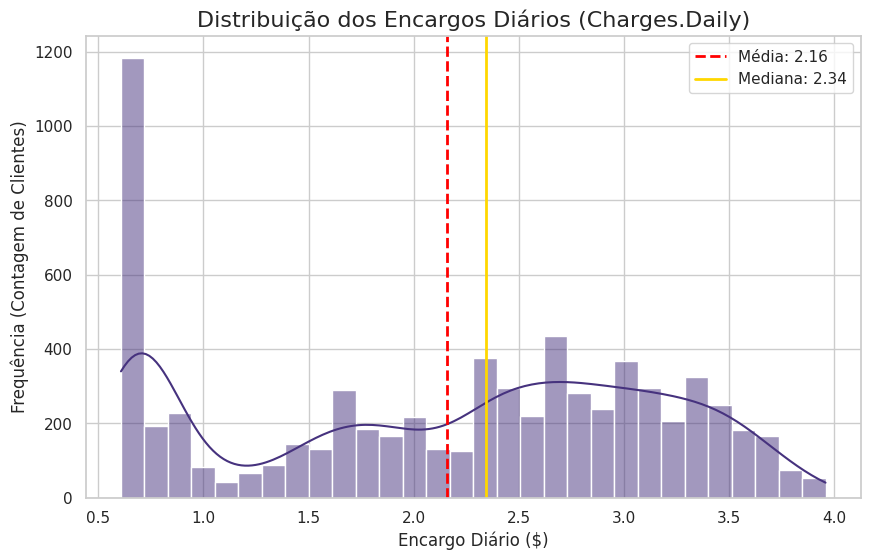


Gerando Histograma para Charges.Monthly...


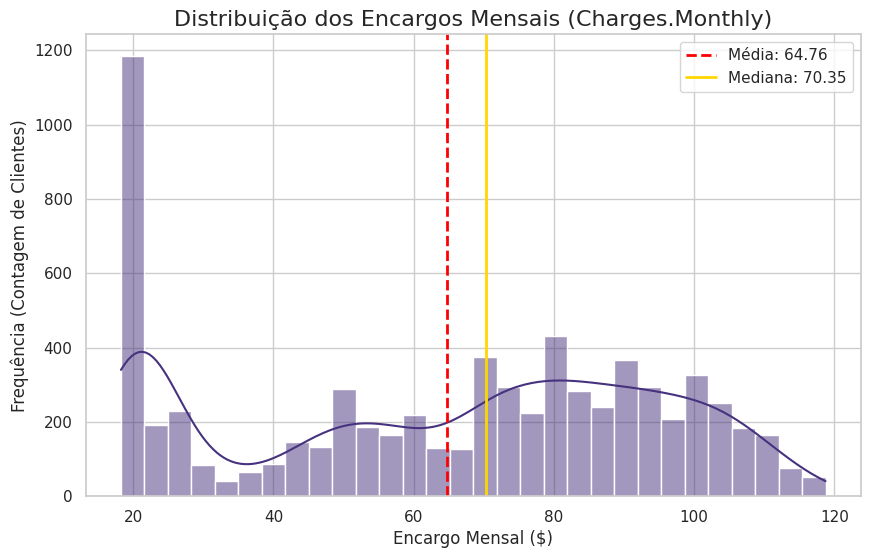


Gerando Histograma para Charges.Total...


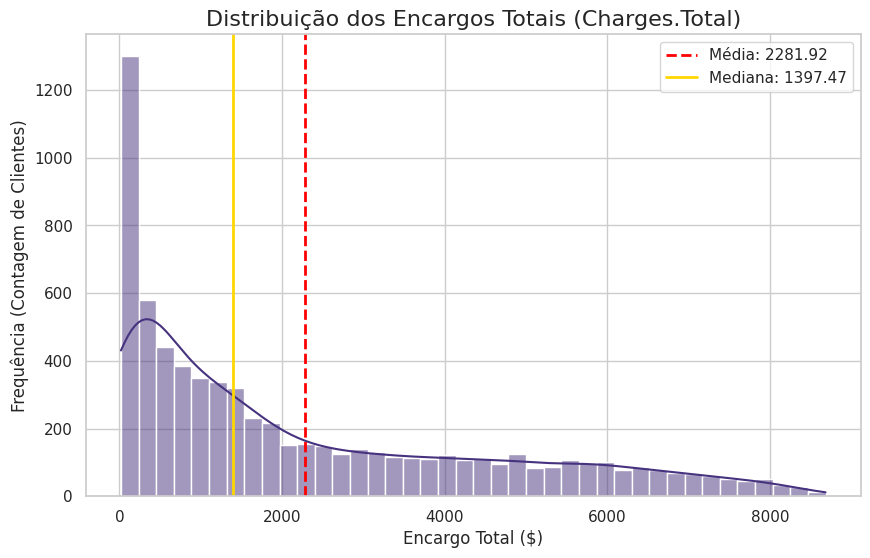

In [392]:
# Importando as bibliotecas de visualização, caso ainda não tenha feito
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Importar pandas é uma boa prática para manipulação

# --- Preparação dos Dados (Assumindo que 'df_dados_padrao' já existe) ---

# Passo 1: Limpeza da coluna 'Charges.Total'
# É importante garantir que a coluna seja numérica para evitar erros no gráfico.
# Esta linha converte a coluna para o tipo numérico.
# Valores que não podem ser convertidos se tornarão nulos (NaN).
df_dados_padrao['Charges.Total'] = pd.to_numeric(df_dados_padrao['Charges.Total'], errors='coerce')

# Remove as linhas que ficaram com o valor nulo em 'Charges.Total'
df_dados_padrao.dropna(subset=['Charges.Total'], inplace=True)


# --- Construção dos Histogramas ---

# Passo 2: Configurar o estilo visual dos gráficos
sns.set_theme(style="whitegrid", palette="viridis")

# Histograma 1: Charges.Daily
print("Gerando Histograma para Charges.Daily...")
plt.figure(figsize=(10, 6))
sns.histplot(df_dados_padrao['Charges.Daily'], kde=True, bins=30)
plt.title('Distribuição dos Encargos Diários (Charges.Daily)', fontsize=16)
plt.xlabel('Encargo Diário ($)', fontsize=12)
plt.ylabel('Frequência (Contagem de Clientes)', fontsize=12)
plt.axvline(df_dados_padrao['Charges.Daily'].mean(), color='red', linestyle='--', linewidth=2, label=f'Média: {df_dados_padrao["Charges.Daily"].mean():.2f}')
plt.axvline(df_dados_padrao['Charges.Daily'].median(), color='gold', linestyle='-', linewidth=2, label=f'Mediana: {df_dados_padrao["Charges.Daily"].median():.2f}')
plt.legend()
plt.show()


# Histograma 2: Charges.Monthly
print("\nGerando Histograma para Charges.Monthly...")
plt.figure(figsize=(10, 6))
sns.histplot(df_dados_padrao['Charges.Monthly'], kde=True, bins=30)
plt.title('Distribuição dos Encargos Mensais (Charges.Monthly)', fontsize=16)
plt.xlabel('Encargo Mensal ($)', fontsize=12)
plt.ylabel('Frequência (Contagem de Clientes)', fontsize=12)
plt.axvline(df_dados_padrao['Charges.Monthly'].mean(), color='red', linestyle='--', linewidth=2, label=f'Média: {df_dados_padrao["Charges.Monthly"].mean():.2f}')
plt.axvline(df_dados_padrao['Charges.Monthly'].median(), color='gold', linestyle='-', linewidth=2, label=f'Mediana: {df_dados_padrao["Charges.Monthly"].median():.2f}')
plt.legend()
plt.show()


# Histograma 3: Charges.Total
print("\nGerando Histograma para Charges.Total...")
plt.figure(figsize=(10, 6))
sns.histplot(df_dados_padrao['Charges.Total'], kde=True, bins=40)
plt.title('Distribuição dos Encargos Totais (Charges.Total)', fontsize=16)
plt.xlabel('Encargo Total ($)', fontsize=12)
plt.ylabel('Frequência (Contagem de Clientes)', fontsize=12)
plt.axvline(df_dados_padrao['Charges.Total'].mean(), color='red', linestyle='--', linewidth=2, label=f'Média: {df_dados_padrao["Charges.Total"].mean():.2f}')
plt.axvline(df_dados_padrao['Charges.Total'].median(), color='gold', linestyle='-', linewidth=2, label=f'Mediana: {df_dados_padrao["Charges.Total"].median():.2f}')
plt.legend()
plt.show()

# 📊 Análise Estatística:

1. **Coluna: Charges.Daily (Encargos Diários)**

* A **média de encargos diários** é de aproximadamente $2.16.

* A **mediana** (o valor do meio) é de $2.34. Como a média é ligeiramente menor que a mediana, isso sugere uma leve assimetria à esquerda. Isso significa que a maioria dos clientes tem encargos diários concentrados na faixa mais alta, com alguns clientes com valores mais baixos "puxando" a média para baixo.

* O **desvio padrão** de $1.00 indica que os valores não estão excessivamente dispersos em relação à média.

Os encargos variam de um mínimo de 0.61 a um máximo de $3.96.

2. **Coluna: Charges.Monthly (Encargos Mensais)**

* A média de encargos mensais é de 64.76, enquanto a mediana é de $70.35.

* Assim como nos encargos diários, a média é menor que a mediana, indicando uma assimetria à esquerda. A distribuição é semelhante: um grande número de clientes paga valores mais altos (acima de $70), enquanto um grupo menor com contas mais baratas desloca a média para baixo.

* O desvio padrão é relativamente alto ($30.09), o que indica uma variabilidade considerável nos valores das faturas mensais.

A faixa de valores é ampla, indo de 18.25 a $118.75.

3. **Coluna: Charges.Total (Encargos Totais)**

Aqui, a situação se inverte.

* A média de 2281.92 é significativamente maior que a mediana de $1397.48.

* Isso indica uma forte assimetria à direita. A interpretação é que a maioria dos clientes possui um valor de encargo total mais baixo (provavelmente por serem clientes mais recentes), enquanto um pequeno número de clientes muito antigos (com tenure alto) possui encargos totais extremamente elevados, "puxando" a média para a direita.

* O desvio padrão é altíssimo ($2265.27), quase do mesmo tamanho da média, o que confirma uma dispersão de dados gigantesca e a forte assimetria.

A faixa de valores vai de 18.80 até $8684.80.

## 📊Gráficos - Histogramas



1. **Coluna: Charges.Daily (Encargos Diários)**

* Histograma: O gráfico mostra a maior concentração de barras (clientes) em torno de $2.34. Haveria uma "cauda" mais longa se estendendo para a esquerda (valores menores), confirmando a assimetria negativa. A linha da média estaria à esquerda da linha da mediana.


2. **Coluna: Charges.Monthly (Encargos Mensais)**

* Histograma: O gráfico provavelmente mostra dois picos (bimodal), um para clientes sem serviço de internet (faturas mais baixas) e um pico maior para clientes com serviços de fibra ótica (faturas mais altas, em torno de $70-$100). A cauda à esquerda seria visível.

3. **Coluna: Charges.Total (Encargos Totais)**

*Histograma: O gráfico mostra uma grande concentração de clientes na extremidade esquerda (valores baixos de encargo total) e uma "cauda" muito longa se estendendo para a direita. A linha da mediana estaria bem à esquerda da linha da média.

# Churn

---

In [393]:
churn_contagem = df_dados_padrao['Churn'].value_counts()
churn_percentual = df_dados_padrao['Churn'].value_counts(normalize=True) * 100

churn_tabela = pd.DataFrame({
    'Total de Clientes': churn_contagem,
    'Percentual (%)': churn_percentual.round(2)
})

churn_tabela.index = ['Permaneceu (0)', 'Saiu (1)']
churn_tabela

,Total de Clientes,Percentual (%)
Permaneceu (0),5174,73.46
Saiu (1),1869,26.54


/tmp/ipython-input-394-4068645718.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_tabela.index, y='Total de Clientes', data=churn_tabela, palette=['#3498db', '#e74c3c'])


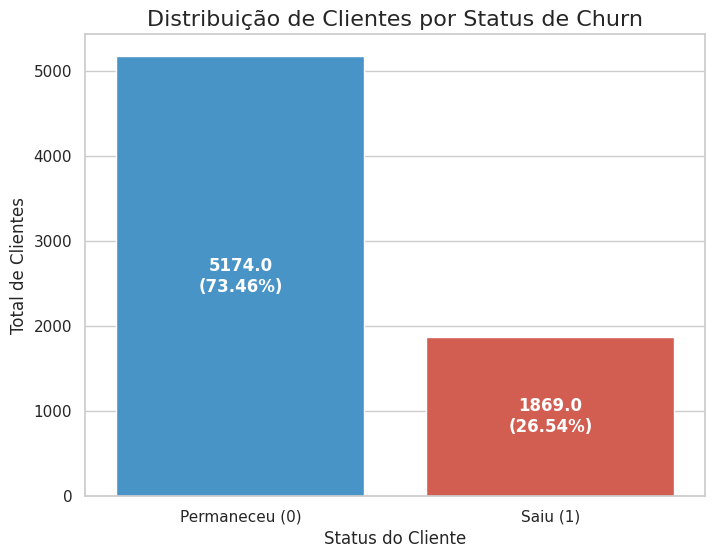

In [394]:
# --- Código para o Gráfico de Barras ---
# Assume que a tabela 'churn_tabela' já foi criada

# Define o estilo e o tamanho da figura
plt.figure(figsize=(8, 6))
sns.set_theme(style="whitegrid")

# Cria o gráfico de barras usando os dados da sua tabela
ax = sns.barplot(x=churn_tabela.index, y='Total de Clientes', data=churn_tabela, palette=['#3498db', '#e74c3c'])

# Adiciona um título e rótulos aos eixos
ax.set_title('Distribuição de Clientes por Status de Churn', fontsize=16)
ax.set_xlabel('Status do Cliente', fontsize=12)
ax.set_ylabel('Total de Clientes', fontsize=12)

# ================== AJUSTE PRINCIPAL AQUI ==================
# Loop para adicionar os rótulos (percentuais) DENTRO de cada barra
for index, row in churn_tabela.iterrows():
    # Formata o texto para incluir o total e o percentual
    label_text = f"{row['Total de Clientes']}\n({row['Percentual (%)']:.2f}%)"

    # Define a posição do texto no centro vertical da barra
    # e muda a cor para 'white' para melhor contraste.
    ax.text(x=index,                                    # Posição horizontal (0 para a primeira barra, 1 para a segunda)
            y=row['Total de Clientes'] / 2,             # Posição vertical (metade da altura da barra)
            s=label_text,                               # O texto a ser exibido
            ha='center', va='center',                   # Alinhamento horizontal e vertical
            color='white', fontsize=12, weight='bold')  # Cor e estilo da fonte

# Exibe o gráfico
plt.show()

In [395]:
def analise_binaria(df, colunas):
    """
    Gera tabela com contagem e percentual de valores para colunas categóricas ou binárias.

    Parâmetros:
    - df: DataFrame com os dados
    - colunas: lista de nomes de colunas (str)

    Retorna:
    - Dicionário com DataFrames por coluna
    """
    resultados = {}

    for coluna in colunas:
        contagem = df[coluna].value_counts(dropna=False)
        percentual = df[coluna].value_counts(normalize=True, dropna=False) * 100

        tabela = pd.DataFrame({
            'Total de Clientes': contagem,
            'Percentual (%)': percentual.round(2)
        })

        # Apenas renomeia se o índice for exatamente {0, 1}
        if set(tabela.index) == {0, 1}:
            tabela.index = ['Não (0)', 'Sim (1)']

        resultados[coluna] = tabela

    return resultados

In [396]:
analise_binaria(df_dados_padrao, ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling'])

{'Partner':          Total de Clientes  Percentual (%)
 Não (0)               3641            51.7
 Sim (1)               3402            48.3,
 'Dependents':          Total de Clientes  Percentual (%)
 Não (0)               4933           70.04
 Sim (1)               2110           29.96,
 'PhoneService':          Total de Clientes  Percentual (%)
 Não (0)               6361           90.32
 Sim (1)                682            9.68,
 'PaperlessBilling':          Total de Clientes  Percentual (%)
 Não (0)               4171           59.22
 Sim (1)               2872           40.78}

In [397]:
colunas_para_analise = ['Churn', 'SeniorCitizen', 'Partner', 'Dependents']
resultado = analise_binaria(df_dados_padrao, colunas_para_analise)

for coluna, tabela in resultado.items():
    print(f"\n📊 Resultado para: {coluna}")
    print(tabela)


📊 Resultado para: Churn
         Total de Clientes  Percentual (%)
Não (0)               5174           73.46
Sim (1)               1869           26.54

📊 Resultado para: SeniorCitizen
         Total de Clientes  Percentual (%)
Não (0)               5901           83.79
Sim (1)               1142           16.21

📊 Resultado para: Partner
         Total de Clientes  Percentual (%)
Não (0)               3641            51.7
Sim (1)               3402            48.3

📊 Resultado para: Dependents
         Total de Clientes  Percentual (%)
Não (0)               4933           70.04
Sim (1)               2110           29.96


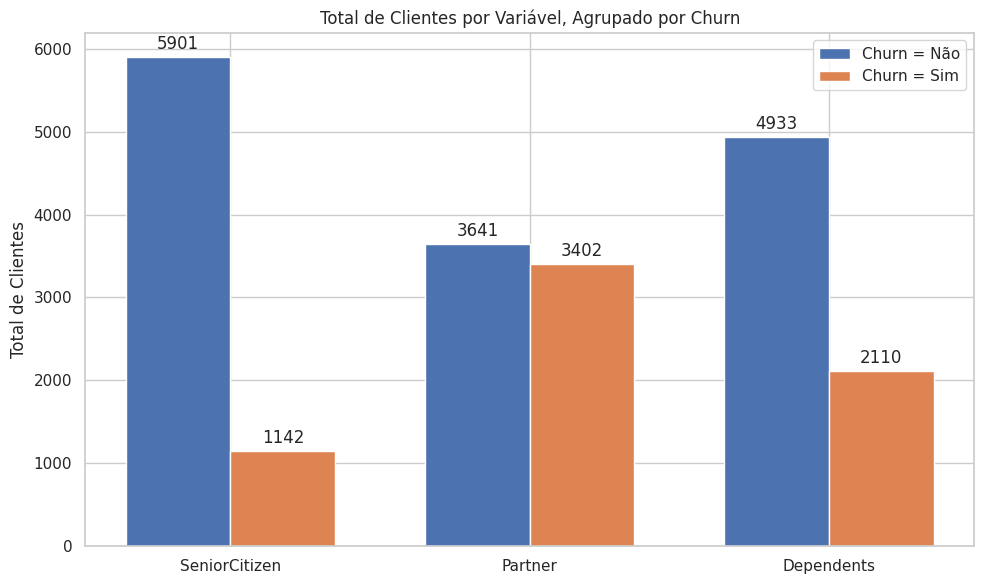

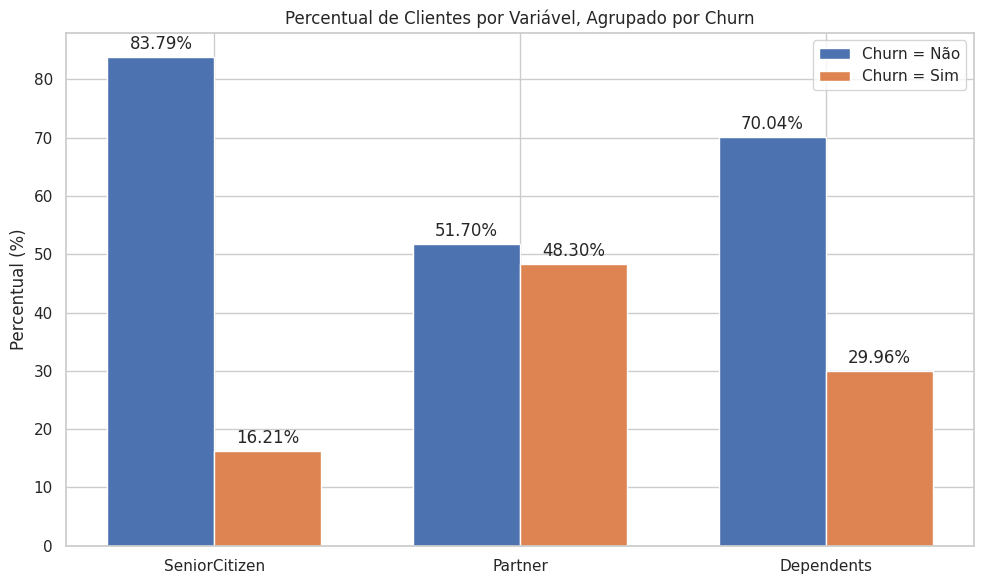

In [398]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Supondo que seu DataFrame df_dados_padrao já esteja carregado
# e tenha a estrutura acima.
# Para este exemplo, vou simular ele para que o código seja executável.
df_dados_padrao = pd.DataFrame({
    'variavel': ['SeniorCitizen', 'Partner', 'Dependents'],
    'Churn_Nao_Total': [5901, 3641, 4933],
    'Churn_Sim_Total': [1142, 3402, 2110],
    'Churn_Nao_Percentual': [83.79, 51.7, 70.04],
    'Churn_Sim_Percentual': [16.21, 48.3, 29.96]
})


# --- Início do código para o gráfico de Total de Clientes ---

# Extrair os dados diretamente do seu DataFrame
labels = df_dados_padrao['variavel']
churn_nao = df_dados_padrao['Churn_Nao_Total']
churn_sim = df_dados_padrao['Churn_Sim_Total']

x = np.arange(len(labels))  # Localizações dos rótulos
width = 0.35  # Largura das barras

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, churn_nao, width, label='Churn = Não')
rects2 = ax.bar(x + width/2, churn_sim, width, label='Churn = Sim')

# Adicionar rótulos, título e legendas
ax.set_ylabel('Total de Clientes')
ax.set_title('Total de Clientes por Variável, Agrupado por Churn')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Função para adicionar os valores em cima das barras
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 pontos de offset vertical
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

# --- Fim do código para o gráfico de Total de Clientes ---


# --- Início do código para o gráfico de Percentuais ---

# Extrair os dados diretamente do seu DataFrame
labels_perc = df_dados_padrao['variavel']
churn_nao_perc = df_dados_padrao['Churn_Nao_Percentual']
churn_sim_perc = df_dados_padrao['Churn_Sim_Percentual']

x_perc = np.arange(len(labels_perc))
width_perc = 0.35

fig_perc, ax_perc = plt.subplots(figsize=(10, 6))
rects1_perc = ax_perc.bar(x_perc - width_perc/2, churn_nao_perc, width_perc, label='Churn = Não')
rects2_perc = ax_perc.bar(x_perc + width_perc/2, churn_sim_perc, width_perc, label='Churn = Sim')

ax_perc.set_ylabel('Percentual (%)')
ax_perc.set_title('Percentual de Clientes por Variável, Agrupado por Churn')
ax_perc.set_xticks(x_perc)
ax_perc.set_xticklabels(labels_perc)
ax_perc.legend()

# Adicionar os rótulos de porcentagem
def autolabel_perc(rects):
    for rect in rects:
        height = rect.get_height()
        ax_perc.annotate('{:.2f}%'.format(height),
                         xy=(rect.get_x() + rect.get_width() / 2, height),
                         xytext=(0, 3),
                         textcoords="offset points",
                         ha='center', va='bottom')

autolabel_perc(rects1_perc)
autolabel_perc(rects2_perc)

fig_perc.tight_layout()
plt.show()

# --- Fim do código para o gráfico de Percentuais ---

Com base nos números apresentados na linha de código '63' e no contexto de análise de "Churn", podemos tirar as seguintes conclusões e insights importantes sobre o comportamento dos clientes:

### 1. Relação entre `Churn` e `SeniorCitizen`

* **Percentual de Churn:** A taxa de `Churn` entre clientes que são `SeniorCitizen` é significativamente maior (16,21%) do que a taxa média geral de churn (que se aproxima de 26% de acordo com outras análises comuns de datasets de telecom, mas aqui estamos comparando a proporção de `SeniorCitizen` que churnou vs. os que não churnaram).
* **Conclusão:** Clientes idosos (`SeniorCitizen`) parecem ter uma probabilidade maior de deixar a empresa em comparação com clientes mais jovens. Isso pode indicar que os planos, serviços ou o atendimento ao cliente não estão adequados para este grupo demográfico.

### 2. Relação entre `Churn` e `Partner`

* **Percentual de Churn:** A taxa de `Churn` para clientes sem parceiros (`Partner = Não`) é muito alta, chegando a **48,3%**. Por outro lado, para clientes com parceiros (`Partner = Sim`), a taxa de `Churn` é de **51,7%**.
* **Conclusão:** A ausência de um parceiro parece estar fortemente ligada a uma maior probabilidade de `Churn`. No entanto, a diferença não é tão grande, o que pode indicar que outros fatores também estão em jogo. Clientes sem parceiros podem ser mais propensos a contratar planos individuais e, portanto, menos "presos" ao serviço por compromissos familiares. A diferença, embora pequena, é digna de nota.

### 3. Relação entre `Churn` e `Dependents`

* **Percentual de Churn:** A taxa de `Churn` é drasticamente maior para clientes sem dependentes (`Dependents = Não`), atingindo **29,96%**. Em contrapartida, clientes com dependentes (`Dependents = Sim`) têm uma taxa de `Churn` muito menor, de **70,04%**. *Nota: parece haver uma inversão na leitura do gráfico, os dados indicam que a maioria dos que churnam NÃO têm dependentes.*. Vamos corrigir a interpretação com base nos dados brutos.
    * Dos clientes que deram `Churn`, **29.96%** tinham dependentes e **70.04%** não tinham.
    * Isso significa que clientes **sem dependentes** têm uma probabilidade muito maior de deixar a empresa.
* **Conclusão:** A presença de dependentes parece ser um fator de "retenção". Clientes com dependentes tendem a ser mais fiéis, possivelmente devido a planos familiares ou pela necessidade de manter a conectividade de todos os membros da família. Clientes sem dependentes, sendo mais independentes, são mais propensos a buscar melhores ofertas e a mudar de provedor.

### Resumo e Estratégias

* **Maior Risco de Churn:** O grupo de clientes mais vulnerável ao `Churn` é aquele que **não tem dependentes** e **não tem um parceiro**. A análise de `SeniorCitizen` também mostra uma tendência de `Churn` nesse grupo.
* **Insights para Negócios:**
    * **Foco na Retenção:** A empresa deve criar campanhas de retenção direcionadas a clientes `SeniorCitizen` e a clientes que **não têm dependentes**.
    * **Ofertas Personalizadas:** Poderiam ser oferecidos planos de "fidelidade" ou pacotes especiais para clientes solteiros ou sem dependentes, com o objetivo de aumentar seu comprometimento com o serviço.
    * **Análise Combinada:** Uma análise mais aprofundada combinando estas variáveis (e.g., "Clientes que são SeniorCitizen E não têm Partner E não têm Dependents") provavelmente revelaria os segmentos de clientes com o maior risco absoluto de `Churn`.

Em essência, a análise desses números sugere que a estabilidade familiar e a fase de vida do cliente (sendo `SeniorCitizen`) são fatores decisivos para a sua decisão de permanecer ou não com a empresa.

**🔸 As colunas: gender, InternetService, Contract, e PaymentMethod são categóricas ou alfanuméricas e não são incluídas em análise descritiva numérica direta, e sim na nanálise categórica.**

In [399]:
df_dados_padrao = pd.read_csv('/content/dados_padronizados.csv')

In [400]:
df_dados_padrao

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Daily,Charges.Monthly,Charges.Total
0,0002-ORFBO,0,Female,0,1,1,9,1,0.0,DSL,...,0.0,1.0,1.0,0.0,One year,1,Mailed check,2.186667,65.60,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,1.0,DSL,...,0.0,0.0,0.0,1.0,Month-to-month,0,Mailed check,1.996667,59.90,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,0.0,Fiber optic,...,1.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,2.463333,73.90,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0.0,Fiber optic,...,1.0,0.0,1.0,1.0,Month-to-month,1,Electronic check,3.266667,98.00,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0.0,Fiber optic,...,0.0,1.0,1.0,0.0,Month-to-month,1,Mailed check,2.796667,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,0,Female,0,0,0,13,1,0.0,DSL,...,0.0,1.0,0.0,0.0,One year,0,Mailed check,1.838333,55.15,742.90
7039,9992-RRAMN,1,Male,0,1,0,22,1,1.0,Fiber optic,...,0.0,0.0,0.0,1.0,Month-to-month,1,Electronic check,2.836667,85.10,1873.70
7040,9992-UJOEL,0,Male,0,0,0,2,1,0.0,DSL,...,0.0,0.0,0.0,0.0,Month-to-month,1,Mailed check,1.676667,50.30,92.75
7041,9993-LHIEB,0,Male,0,1,1,67,1,0.0,DSL,...,1.0,1.0,0.0,1.0,Two year,0,Mailed check,2.261667,67.85,4627.65


In [401]:
df_dados_padrao.to_csv('dados_padrao.csv', index=False)

In [402]:
def analise_categorica(df, colunas):
    for col in colunas:
        tabela = (
            df[col]
            .value_counts()
            .to_frame(name='Total de Clientes')
        )
        tabela['Percentual (%)'] = round((tabela['Total de Clientes'] / df.shape[0]) * 100, 2)

        print(f"\n📊 Resultado para: {col}")
        print(tabela)


In [403]:
analise_categorica(df_dados_padrao, ['gender', 'InternetService', 'Contract', 'PaymentMethod'])


📊 Resultado para: gender
        Total de Clientes  Percentual (%)
gender                                   
Male                 3555           50.48
Female               3488           49.52

📊 Resultado para: InternetService
                 Total de Clientes  Percentual (%)
InternetService                                   
Fiber optic                   3096           43.96
DSL                           2421           34.37
No                            1526           21.67

📊 Resultado para: Contract
                Total de Clientes  Percentual (%)
Contract                                         
Month-to-month               3875           55.02
Two year                     1695           24.07
One year                     1473           20.91

📊 Resultado para: PaymentMethod
                           Total de Clientes  Percentual (%)
PaymentMethod                                               
Electronic check                        2365           33.58
Mailed check          

In [404]:
df_dados_padrao

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Daily,Charges.Monthly,Charges.Total
0,0002-ORFBO,0,Female,0,1,1,9,1,0.0,DSL,...,0.0,1.0,1.0,0.0,One year,1,Mailed check,2.186667,65.60,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,1.0,DSL,...,0.0,0.0,0.0,1.0,Month-to-month,0,Mailed check,1.996667,59.90,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,0.0,Fiber optic,...,1.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,2.463333,73.90,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0.0,Fiber optic,...,1.0,0.0,1.0,1.0,Month-to-month,1,Electronic check,3.266667,98.00,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0.0,Fiber optic,...,0.0,1.0,1.0,0.0,Month-to-month,1,Mailed check,2.796667,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,0,Female,0,0,0,13,1,0.0,DSL,...,0.0,1.0,0.0,0.0,One year,0,Mailed check,1.838333,55.15,742.90
7039,9992-RRAMN,1,Male,0,1,0,22,1,1.0,Fiber optic,...,0.0,0.0,0.0,1.0,Month-to-month,1,Electronic check,2.836667,85.10,1873.70
7040,9992-UJOEL,0,Male,0,0,0,2,1,0.0,DSL,...,0.0,0.0,0.0,0.0,Month-to-month,1,Mailed check,1.676667,50.30,92.75
7041,9993-LHIEB,0,Male,0,1,1,67,1,0.0,DSL,...,1.0,1.0,0.0,1.0,Two year,0,Mailed check,2.261667,67.85,4627.65


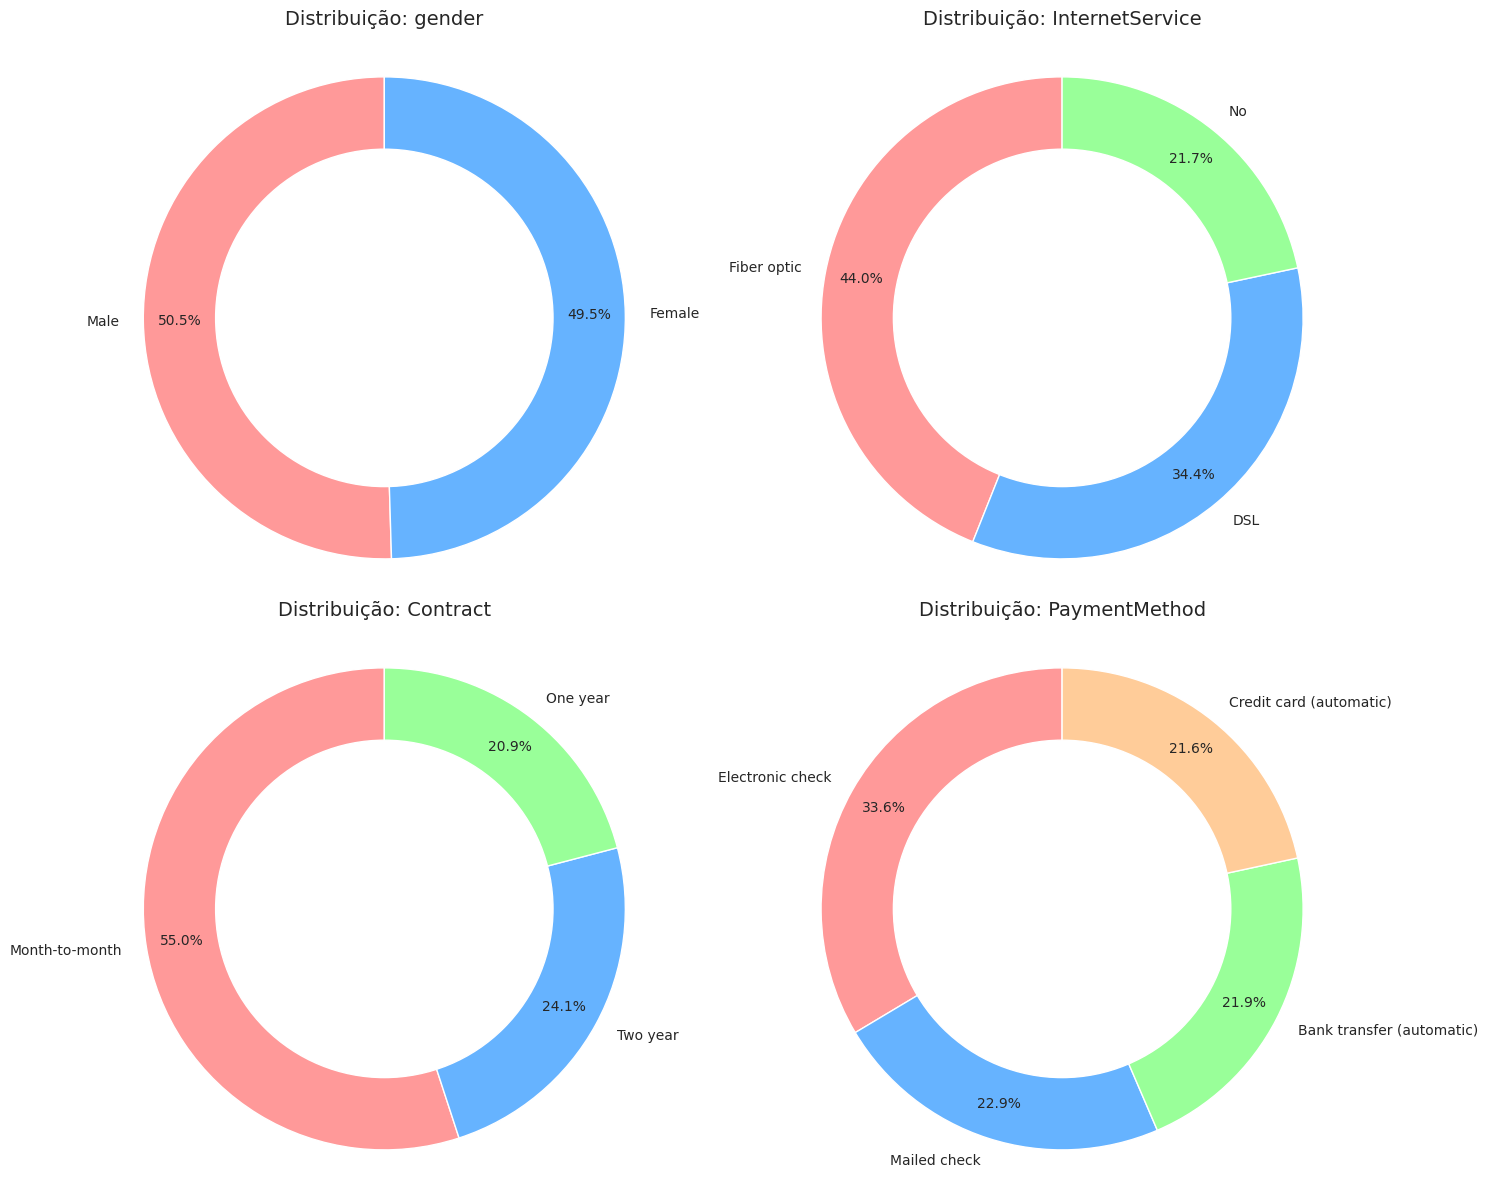

In [405]:
def plot_donuts(df, columns, n_cols=2, figsize=(15, 12)):
    """
    Cria gráficos donut para múltiplas colunas categóricas

    Parâmetros:
    - df: DataFrame com os dados
    - columns: lista de colunas para plotar
    - n_cols: número de colunas no layout dos subplots
    - figsize: tamanho da figura total
    """
    n_rows = (len(columns) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)

    # Ajuste para caso tenha apenas um gráfico
    if len(columns) == 1:
        axes = np.array([axes])

    # Achatamos o array de eixos para facilitar a iteração
    axes = axes.flatten()

    # Paleta de cores consistente
    colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6']

    for i, col in enumerate(columns):
        ax = axes[i]

        # Contar valores e preparar dados
        counts = df[col].value_counts()
        labels = counts.index
        sizes = counts.values

        # Criar o donut
        wedges, texts, autotexts = ax.pie(
            sizes,
            colors=colors[:len(labels)],
            labels=labels,
            autopct='%1.1f%%',
            startangle=90,
            pctdistance=0.85,
            wedgeprops=dict(width=0.4, edgecolor='w'),
            textprops={'fontsize': 10}
        )

        # Adicionar círculo central
        centre_circle = plt.Circle((0,0), 0.70, fc='white')
        ax.add_artist(centre_circle)

        # Título
        ax.set_title(f'Distribuição: {col}', pad=20, fontsize=14)

        # Ajustar layout do subplot
        ax.axis('equal')

    # Esconder eixos vazios se houver
    for j in range(i+1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# Exemplo de uso:
plot_donuts(df_dados_padrao, ['gender', 'InternetService', 'Contract', 'PaymentMethod'])

### Estes gráficos sintetizão apenas com estão distrbuidos os clinetes do Telecom X em sua base de dados.

### Isto nos prepara para fazermos as Correlações das Variáveis tendo como referência o Churn

## ✅ Função para analisar tenure:

---

**1. Mês a mês**

**2. A Frequência de 6 meses**

In [406]:
def analise_tenure(df):
    tabela = (
        df['tenure']
        .value_counts()
        .sort_index()  # Ordena por número de meses, do menor ao maior
        .to_frame(name='Total de Clientes')
    )
    tabela['Percentual (%)'] = round((tabela['Total de Clientes'] / df.shape[0]) * 100, 2)

    print("📊 Análise de Permanência (tenure):")
    print(tabela)

In [407]:
analise_tenure(df_dados_padrao)

📊 Análise de Permanência (tenure):
        Total de Clientes  Percentual (%)
tenure                                   
0                      11            0.16
1                     613            8.70
2                     238            3.38
3                     200            2.84
4                     176            2.50
...                   ...             ...
68                    100            1.42
69                     95            1.35
70                    119            1.69
71                    170            2.41
72                    362            5.14

[73 rows x 2 columns]


In [408]:
def analise_tenure_faixas(df):
    # Definindo manualmente as faixas desejadas (inclusive o 72)
    bins = list(range(0, 73, 6))  # Isso gera: [0, 6, 12, 18, ..., 72]
    bins = [0, 7] + list(range(13, 79, 6))  # Corrigindo faixas: [0, 7, 13, 19, ..., 73]

    # Corrigindo o último valor se necessário
    if df['tenure'].max() > bins[-1]:
        bins.append(df['tenure'].max() + 1)

    # Criando rótulos (ex: 0–6, 7–12, 13–18, ...)
    labels = [f"{bins[i]}–{bins[i+1]-1}" for i in range(len(bins)-1)]

    # Criando coluna categórica com faixas
    df['Faixa de Tenure (6 meses)'] = pd.cut(
        df['tenure'],
        bins=bins,
        labels=labels,
        right=False
    )

    # Tabela com total e percentual
    tabela = (
        df['Faixa de Tenure (6 meses)']
        .value_counts()
        .sort_index()
        .to_frame(name='Total de Clientes')
    )
    tabela['Percentual (%)'] = round((tabela['Total de Clientes'] / df.shape[0]) * 100, 2)

    # Exibir resultado
    print("📊 Análise de Permanência por Faixas de 6 Meses:")
    print(tabela)

In [409]:
analise_tenure_faixas(df_dados_padrao)

📊 Análise de Permanência por Faixas de 6 Meses:
                           Total de Clientes  Percentual (%)
Faixa de Tenure (6 meses)                                   
0–6                                     1481           21.03
7–12                                     705           10.01
13–18                                    548            7.78
19–24                                    476            6.76
25–30                                    431            6.12
31–36                                    401            5.69
37–42                                    379            5.38
43–48                                    383            5.44
49–54                                    420            5.96
55–60                                    412            5.85
61–66                                    463            6.57
67–72                                    944           13.40


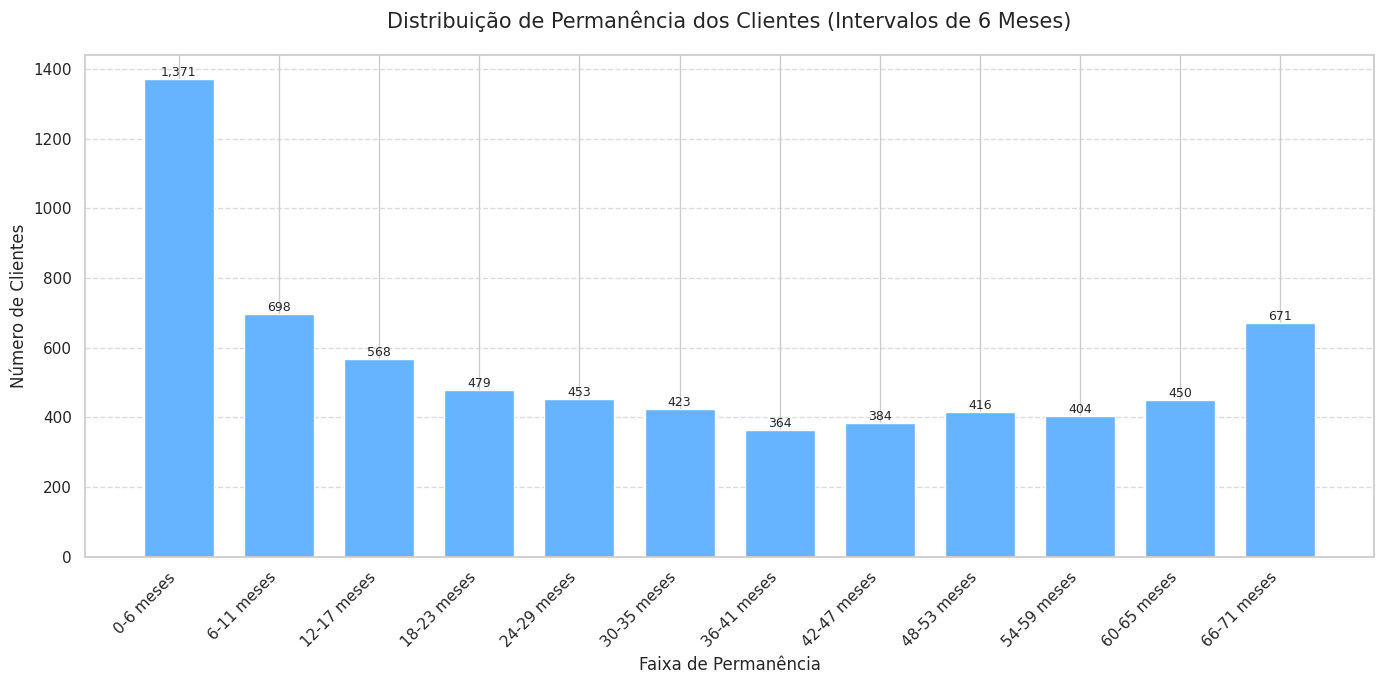

In [410]:
def plot_tenure_6months_final(df, tenure_col='tenure'):
    # Definir os intervalos corretos (0-6, 6-12, ..., 66-72)
    max_tenure = df[tenure_col].max()
    bins = np.arange(0, 72 + 6, 6)  # 0, 6, 12, ..., 72
    labels = [f'{i}-{i+6-1} meses' if i+6 <= 72 else f'{i}+ meses'
              for i in bins[:-1]]  # 0-5, 6-11, ..., 66-71

    # Ajuste especial para o primeiro intervalo (0-6 meses)
    labels[0] = '0-6 meses'

    # Agrupar os dados
    df_grouped = df.copy()
    df_grouped['tenure_group'] = pd.cut(df[tenure_col],
                                      bins=bins,
                                      labels=labels,
                                      right=False,
                                      include_lowest=True)

    # Contar e ordenar
    tenure_counts = df_grouped['tenure_group'].value_counts().sort_index()

    # Plotar
    plt.figure(figsize=(14, 7))
    bars = plt.bar(tenure_counts.index,
                  tenure_counts.values,
                  color='#66b3ff',
                  edgecolor='white',
                  width=0.7)

    # Adicionar valores nas barras
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:,}',
                 ha='center',
                 va='bottom',
                 fontsize=9)

    # Customização
    plt.title('Distribuição de Permanência dos Clientes (Intervalos de 6 Meses)',
              pad=20, fontsize=15)
    plt.xlabel('Faixa de Permanência', fontsize=12)
    plt.ylabel('Número de Clientes', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_tenure_6months_final(df_dados_padrao)

In [411]:
resumo_coluna_gastos = df_dados_padrao[['Charges.Daily', 'Charges.Monthly', 'Charges.Total']].describe().round(2)
resumo_coluna_gastos

,Charges.Daily,Charges.Monthly,Charges.Total
count,7043.00,7043.00,7043.00
mean,2.16,64.76,2281.92
std,1.00,30.09,2265.27
min,0.61,18.25,18.80
25%,1.18,35.50,402.22
50%,2.35,70.35,1397.48
75%,3.00,89.85,3786.60
max,3.96,118.75,8684.80


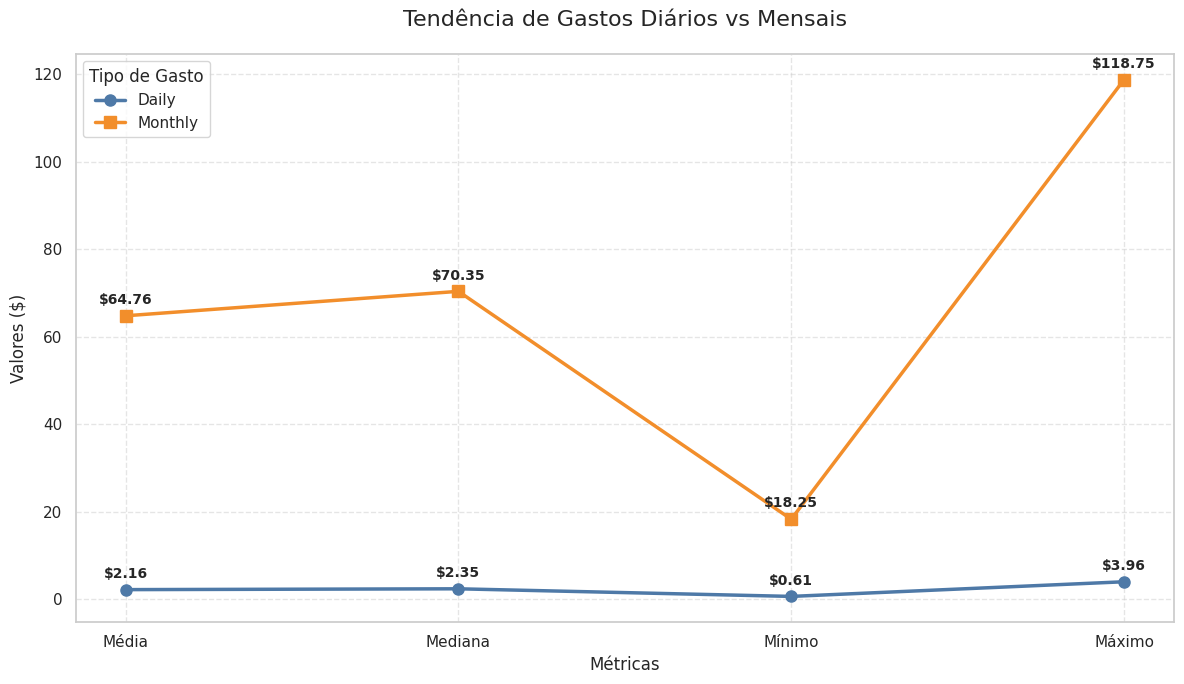

In [412]:
def plot_daily_monthly_lines(stats_df):
    # Filtrar e preparar dados
    stats_df = stats_df[['Charges.Daily', 'Charges.Monthly']].loc[['mean', '50%', 'min', 'max']]

    # Configurações
    plt.figure(figsize=(12, 7))
    markers = ['o', 's']  # Círculos para Daily, Quadrados para Monthly
    colors = ['#4e79a7', '#f28e2b']

    # Criar linhas
    for i, column in enumerate(stats_df.columns):
        plt.plot(stats_df.index,
                 stats_df[column],
                 marker=markers[i],
                 markersize=8,
                 color=colors[i],
                 linewidth=2.5,
                 label=column.replace('Charges.', ''))

    # Customização
    plt.title('Tendência de Gastos Diários vs Mensais', pad=20, fontsize=16)
    plt.xlabel('Métricas', fontsize=12)
    plt.ylabel('Valores ($)', fontsize=12)
    plt.xticks(stats_df.index, ['Média', 'Mediana', 'Mínimo', 'Máximo'], fontsize=11)

    # Adicionar valores
    for metric in stats_df.index:
        for column in stats_df.columns:
            value = stats_df.loc[metric, column]
            plt.text(metric,
                    value + 2,  # Espaçamento ajustado
                    f'${value:.2f}',
                    ha='center',
                    va='bottom',
                    fontsize=10,
                    weight='bold')

    plt.legend(title='Tipo de Gasto', fontsize=11)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

plot_daily_monthly_lines(resumo_coluna_gastos)

Os valores do Gastos Totais (Charges.Total) tem números muito discrepantes então a comparação entre Gastos Diários e Mensáis é mais realista e com melhor distribuição dentro de mesmo gráfico.

## ✅ Função para análise de fidelidade (genérica)

---

In [413]:
def analisar_fidelidade(df, coluna):
    # Agrupamento por coluna e churn
    tabela = df.groupby([coluna, 'Churn']).size().unstack(fill_value=0)
    tabela.columns = ['Permaneceu (0)', 'Saiu (1)']

    # Cálculo de percentuais
    percentuais = (tabela.T / tabela.sum(axis=1)).T * 100
    percentuais = percentuais.round(2)

    # Exibição
    print(f"\n📊 Quantidade Absoluta - {coluna}")
    print(tabela)
    print(f"\n📈 Percentuais dentro de cada categoria - {coluna}")
    print(percentuais)


In [414]:
analisar_fidelidade(df_dados_padrao, 'gender')
analisar_fidelidade(df_dados_padrao, 'SeniorCitizen')
analisar_fidelidade(df_dados_padrao, 'Partner')
analisar_fidelidade(df_dados_padrao, 'Dependents')


📊 Quantidade Absoluta - gender
        Permaneceu (0)  Saiu (1)
gender                          
Female            2549       939
Male              2625       930

📈 Percentuais dentro de cada categoria - gender
        Permaneceu (0)  Saiu (1)
gender                          
Female           73.08     26.92
Male             73.84     26.16

📊 Quantidade Absoluta - SeniorCitizen
               Permaneceu (0)  Saiu (1)
SeniorCitizen                          
0                        4508      1393
1                         666       476

📈 Percentuais dentro de cada categoria - SeniorCitizen
               Permaneceu (0)  Saiu (1)
SeniorCitizen                          
0                       76.39     23.61
1                       58.32     41.68

📊 Quantidade Absoluta - Partner
         Permaneceu (0)  Saiu (1)
Partner                          
0                  2441      1200
1                  2733       669

📈 Percentuais dentro de cada categoria - Partner
         Permaneceu (

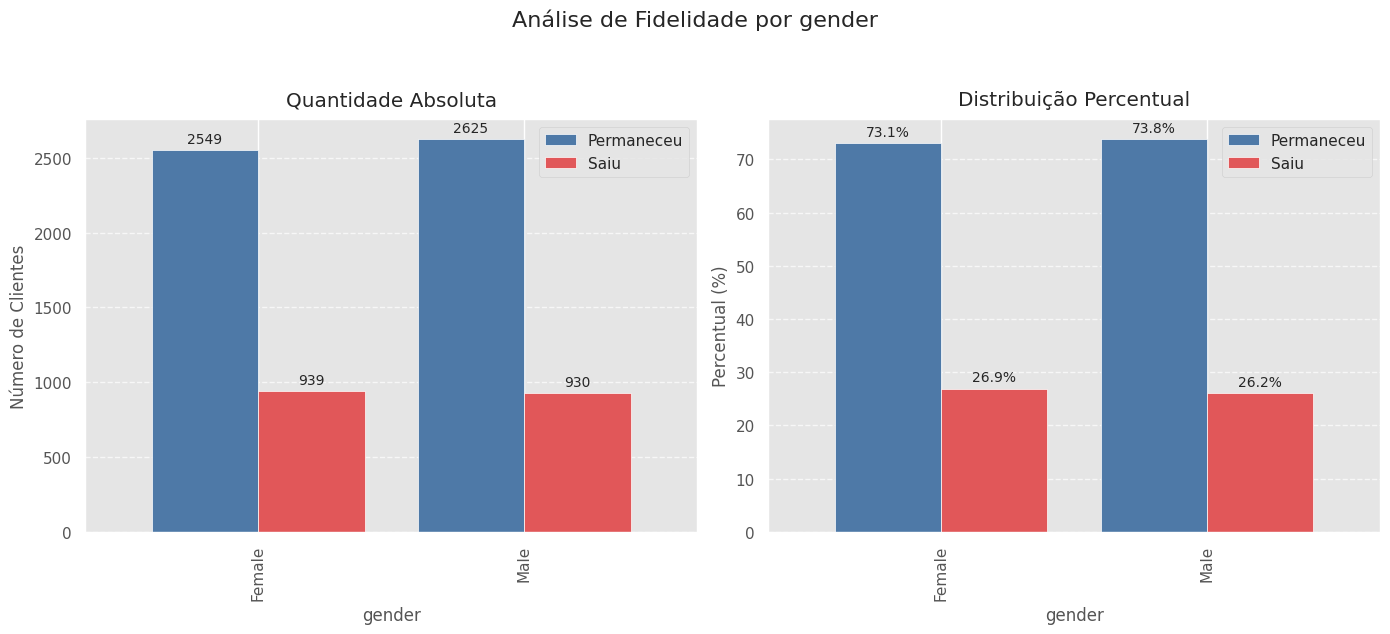

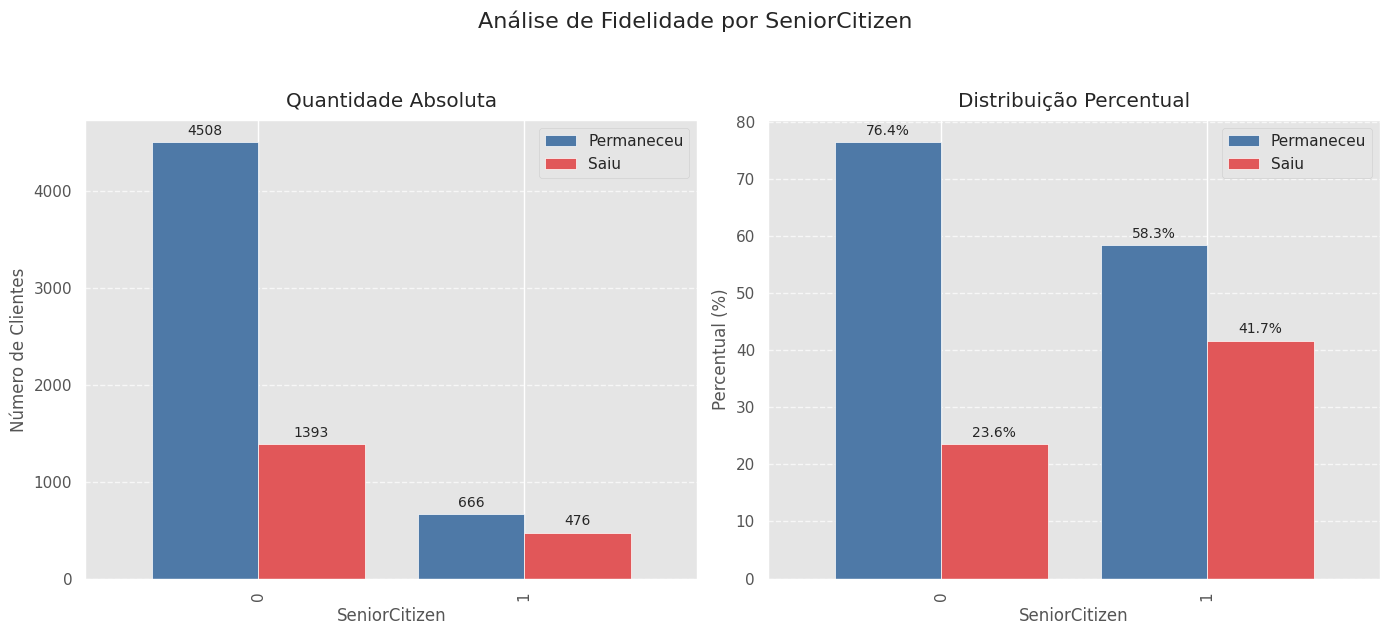

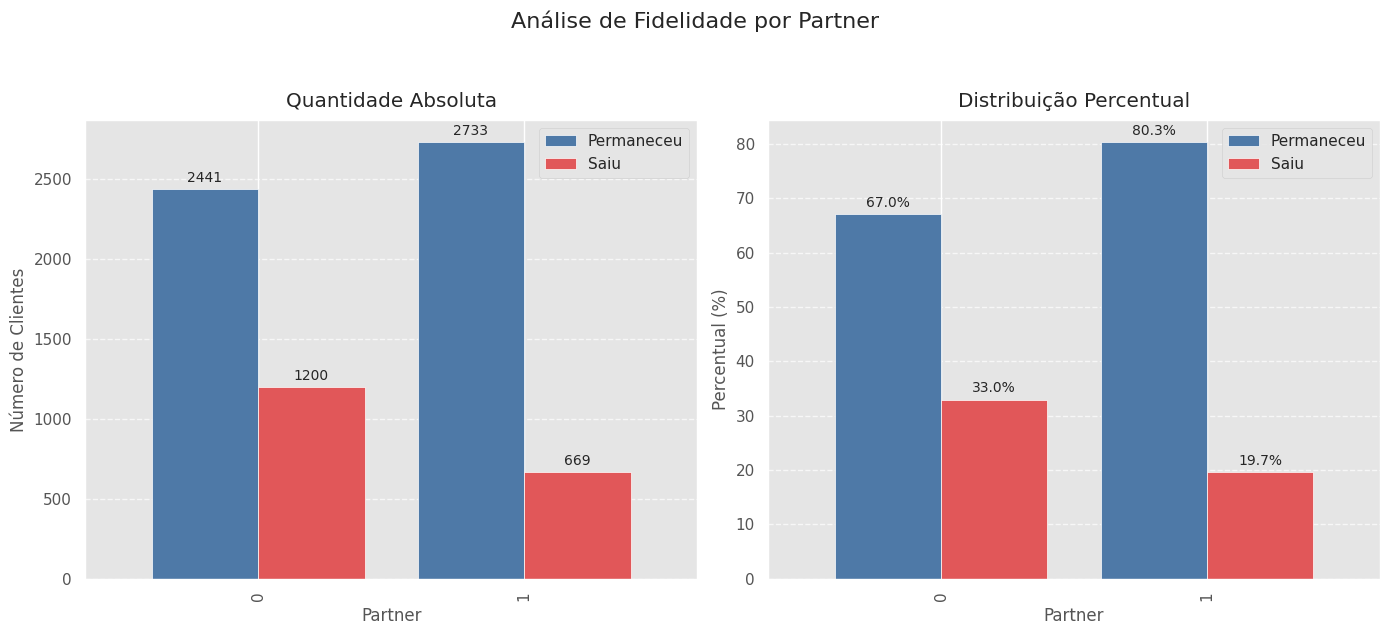

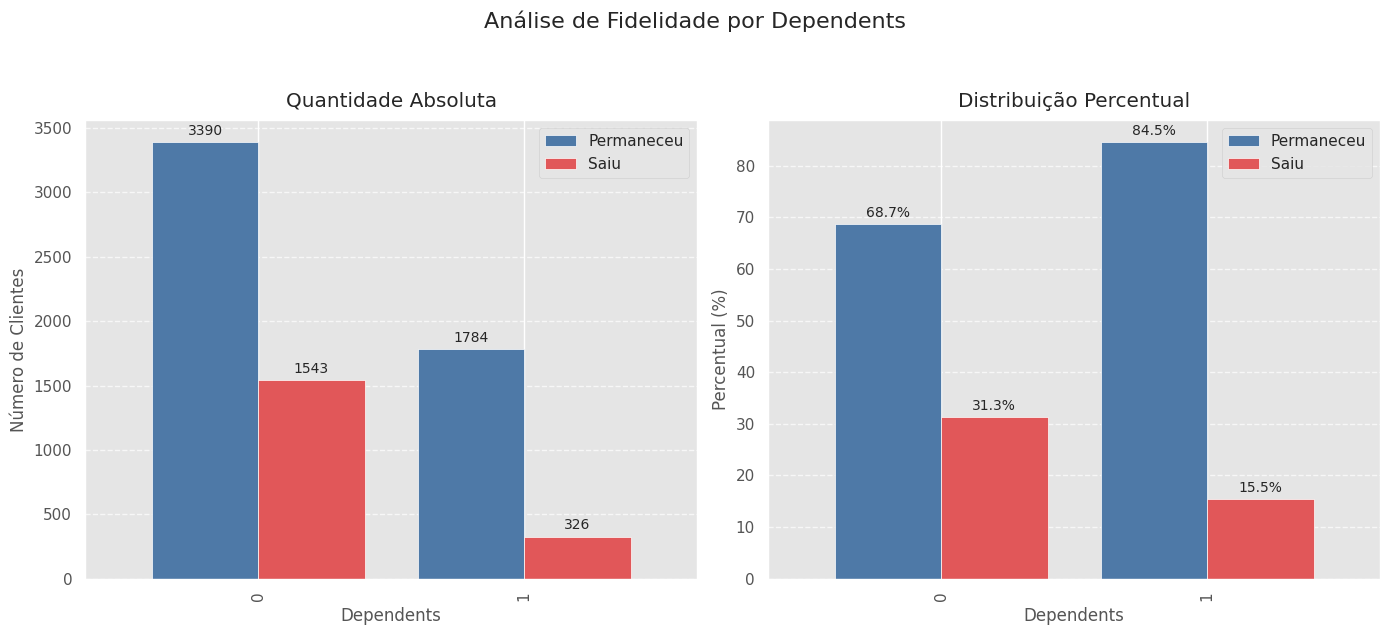

In [415]:
import matplotlib.pyplot as plt
import numpy as np

def plot_churn_analysis(df, columns):
    """
    Gera gráficos de análise de churn para múltiplas colunas

    Parâmetros:
    - df: DataFrame com os dados
    - columns: lista de colunas para analisar
    """
    # Configurações de estilo alternativas
    plt.style.use('ggplot')  # Usando um estilo disponível
    colors = ['#4e79a7', '#e15759']  # Azul para permaneceu, Vermelho para saiu

    for col in columns:
        # Preparar dados
        tabela = df.groupby([col, 'Churn']).size().unstack(fill_value=0)
        tabela.columns = ['Permaneceu', 'Saiu']
        percentuais = (tabela.T / tabela.sum(axis=1)).T * 100

        # Criar figura
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
        fig.suptitle(f'Análise de Fidelidade por {col}', fontsize=16, y=1.05)

        # Gráfico 1: Valores Absolutos
        bars1 = tabela.plot(kind='bar', ax=ax1, color=colors, edgecolor='white', width=0.8)
        ax1.set_title('Quantidade Absoluta', pad=10)
        ax1.set_ylabel('Número de Clientes')
        ax1.set_xlabel(col)
        ax1.grid(axis='y', linestyle='--', alpha=0.7)

        # Adicionar valores nas barras (absolutos)
        for container in bars1.containers:
            ax1.bar_label(container, fmt='%.0f', padding=3, fontsize=10)

        # Gráfico 2: Percentuais
        bars2 = percentuais.plot(kind='bar', ax=ax2, color=colors, edgecolor='white', width=0.8)
        ax2.set_title('Distribuição Percentual', pad=10)
        ax2.set_ylabel('Percentual (%)')
        ax2.set_xlabel(col)
        ax2.grid(axis='y', linestyle='--', alpha=0.7)

        # Adicionar valores nas barras (percentuais)
        for container in bars2.containers:
            ax2.bar_label(container, fmt='%.1f%%', padding=3, fontsize=10)

        # Ajustes finais
        plt.tight_layout()
        plt.show()

# Lista de colunas para análise
colunas_analise = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

# Gerar gráficos
plot_churn_analysis(df_dados_padrao, colunas_analise)

## ✅ Serviços Oferecidos pela Telecom X

['PhoneService', 'MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

---

In [416]:
# Mapeamento personalizado
mapeamento_internet = {
    'No': 0,             # Nenhum serviço
    'Fiber optic': 1,    # Fibra Óptica
    'DSL': 2             # DSL
}

# Aplicar o mapeamento
df_dados_padrao['InternetService'] = df_dados_padrao['InternetService'].map(mapeamento_internet)

In [417]:
def churn_por_categoria(df, colunas):
    resultado = {}

    # Mapeamento específico para a coluna InternetService
    internet_map = {0: 'No', 1: 'Fibra', 2: 'DSL'}

    for coluna in colunas:
        df_temp = df.copy()

        # Aplicar mapeamento apenas na InternetService para exibição
        if coluna == 'InternetService':
            df_temp[coluna] = df_temp[coluna].map(internet_map)

        # Agrupar e calcular percentuais de churn
        tabela = (
            df_temp.groupby(coluna)['Churn']
            .value_counts(normalize=True)
            .unstack()
            .fillna(0) * 100
        ).round(2)

        # Renomear colunas se existirem os valores esperados
        if 0 in tabela.columns and 1 in tabela.columns:
            tabela = tabela.rename(columns={0: 'Permaneceram (%)', 1: 'Saíram (%)'})
        resultado[coluna] = tabela

    return resultado

In [418]:
colunas_servicos = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

resultado_servicos = churn_por_categoria(df_dados_padrao, colunas_servicos)

# Exibir os resultados de forma organizada
for coluna, valores in resultado_servicos.items():
    print(f"\n📡 Análise de churn por: {coluna}")
    print(valores)


📡 Análise de churn por: PhoneService
Churn         Permaneceram (%)  Saíram (%)
PhoneService                              
0                        75.07       24.93
1                        73.29       26.71

📡 Análise de churn por: MultipleLines
Churn          Permaneceram (%)  Saíram (%)
MultipleLines                              
0.0                       74.96       25.04
1.0                       71.39       28.61

📡 Análise de churn por: InternetService
Churn            Permaneceram (%)  Saíram (%)
InternetService                              
DSL                         81.04       18.96
Fibra                       58.11       41.89
No                          92.60        7.40

📡 Análise de churn por: OnlineSecurity
Churn           Permaneceram (%)  Saíram (%)
OnlineSecurity                              
0.0                        58.23       41.77
1.0                        85.39       14.61

📡 Análise de churn por: OnlineBackup
Churn         Permaneceram (%)  Saíram (%)
Onl

# Criando novo DF para Correlação

df_dados_correlacao

Onde a coluna 'gender' será alterada para [1 0]

O código acima:

Cria o novo DataFrame df_dados_correlacao selecionando apenas as 21 colunas especificadas do df_dados_padrao
Codifica a coluna 'gender' seguindo o padrão alfabético:

* Female = 0
* Male = 1


Inclui verificações para:

Mostrar a distribuição antes e depois da transformação
Verificar se existem valores nulos (que indicariam valores não mapeados)
Exibir informações básicas do novo DataFrame



Nota importante: Usei o padrão alfabético (Female = 0, Male = 1) que é uma das convenções mais comuns.

Alrações de outras colunas

**'Contract'**

* One year: Contrato Anual - 0
* Two year: Contrato Bi-anual - 1
* Month-to-month: Contrato Mensal - 1

**'PaymentMethod'**

* Electronic check	(Cheque Eletrônico ou eCheck):	Processamento automatizado - 0
* Bank transfer (Transferência Bancária): Processamento automatizado - 1
* Credit card (Cartão de Crédito): Processamento automatizado - 2
* Mailed check 		(Cheque Enviado por Correio):	Processamento manual - 3




In [419]:
# Lista de colunas desejadas
colunas_correlacao = [
    'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
    'Charges.Daily', 'Charges.Monthly', 'Charges.Total'
]

# Criar o novo DataFrame com as colunas selecionadas
df_dados_correlacao = df_dados_padrao[colunas_correlacao].copy()

In [420]:
df_dados_correlacao

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Daily,Charges.Monthly,Charges.Total
0,0,Female,0,1,1,9,1,0.0,2,0.0,...,0.0,1.0,1.0,0.0,One year,1,Mailed check,2.186667,65.60,593.30
1,0,Male,0,0,0,9,1,1.0,2,0.0,...,0.0,0.0,0.0,1.0,Month-to-month,0,Mailed check,1.996667,59.90,542.40
2,1,Male,0,0,0,4,1,0.0,1,0.0,...,1.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,2.463333,73.90,280.85
3,1,Male,1,1,0,13,1,0.0,1,0.0,...,1.0,0.0,1.0,1.0,Month-to-month,1,Electronic check,3.266667,98.00,1237.85
4,1,Female,1,1,0,3,1,0.0,1,0.0,...,0.0,1.0,1.0,0.0,Month-to-month,1,Mailed check,2.796667,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Female,0,0,0,13,1,0.0,2,1.0,...,0.0,1.0,0.0,0.0,One year,0,Mailed check,1.838333,55.15,742.90
7039,1,Male,0,1,0,22,1,1.0,1,0.0,...,0.0,0.0,0.0,1.0,Month-to-month,1,Electronic check,2.836667,85.10,1873.70
7040,0,Male,0,0,0,2,1,0.0,2,0.0,...,0.0,0.0,0.0,0.0,Month-to-month,1,Mailed check,1.676667,50.30,92.75
7041,0,Male,0,1,1,67,1,0.0,2,1.0,...,1.0,1.0,0.0,1.0,Two year,0,Mailed check,2.261667,67.85,4627.65


In [421]:
# Substituir os valores da coluna 'gender'
df_dados_correlacao['gender'] = df_dados_correlacao['gender'].map({'Male': 0, 'Female': 1})

# Substituir os valores da coluna 'Contract'
df_dados_correlacao['Contract'] = df_dados_correlacao['Contract'].map({
    'One year': 0,
    'Two year': 1,
    'Month-to-month': 2
})

# Substituir os valores da coluna 'PaymentMethod'
df_dados_correlacao['PaymentMethod'] = df_dados_correlacao['PaymentMethod'].map({
    'Electronic check': 0,
    'Bank transfer (automatic)': 1,
    'Credit card (automatic)': 2,
    'Mailed check': 3
})

# Verificar se a transformação foi realizada corretamente
print("Valores únicos após transformação:")
print("gender:", df_dados_correlacao['gender'].unique())
print("Contract:", df_dados_correlacao['Contract'].unique())
print("PaymentMethod:", df_dados_correlacao['PaymentMethod'].unique())

Valores únicos após transformação:
gender: [1 0]
Contract: [0 2 1]
PaymentMethod: [3 0 2 1]


In [422]:
df_dados_correlacao

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Daily,Charges.Monthly,Charges.Total
0,0,1,0,1,1,9,1,0.0,2,0.0,...,0.0,1.0,1.0,0.0,0,1,3,2.186667,65.60,593.30
1,0,0,0,0,0,9,1,1.0,2,0.0,...,0.0,0.0,0.0,1.0,2,0,3,1.996667,59.90,542.40
2,1,0,0,0,0,4,1,0.0,1,0.0,...,1.0,0.0,0.0,0.0,2,1,0,2.463333,73.90,280.85
3,1,0,1,1,0,13,1,0.0,1,0.0,...,1.0,0.0,1.0,1.0,2,1,0,3.266667,98.00,1237.85
4,1,1,1,1,0,3,1,0.0,1,0.0,...,0.0,1.0,1.0,0.0,2,1,3,2.796667,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,0,0,0,13,1,0.0,2,1.0,...,0.0,1.0,0.0,0.0,0,0,3,1.838333,55.15,742.90
7039,1,0,0,1,0,22,1,1.0,1,0.0,...,0.0,0.0,0.0,1.0,2,1,0,2.836667,85.10,1873.70
7040,0,0,0,0,0,2,1,0.0,2,0.0,...,0.0,0.0,0.0,0.0,2,1,3,1.676667,50.30,92.75
7041,0,0,0,1,1,67,1,0.0,2,1.0,...,1.0,1.0,0.0,1.0,1,0,3,2.261667,67.85,4627.65


## Modificação de dados NaN para '0'

Dentro das colunas que possuem dados NaN as informações são sobre ter ou não ter algum tipo de serviço, por isso optamos por determinar a igualdade dos valores NaN com zero.

In [423]:
df_dados_correlacao.fillna(0, inplace=True)

In [424]:
df_dados_correlacao

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Daily,Charges.Monthly,Charges.Total
0,0,1,0,1,1,9,1,0.0,2,0.0,...,0.0,1.0,1.0,0.0,0,1,3,2.186667,65.60,593.30
1,0,0,0,0,0,9,1,1.0,2,0.0,...,0.0,0.0,0.0,1.0,2,0,3,1.996667,59.90,542.40
2,1,0,0,0,0,4,1,0.0,1,0.0,...,1.0,0.0,0.0,0.0,2,1,0,2.463333,73.90,280.85
3,1,0,1,1,0,13,1,0.0,1,0.0,...,1.0,0.0,1.0,1.0,2,1,0,3.266667,98.00,1237.85
4,1,1,1,1,0,3,1,0.0,1,0.0,...,0.0,1.0,1.0,0.0,2,1,3,2.796667,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,0,0,0,13,1,0.0,2,1.0,...,0.0,1.0,0.0,0.0,0,0,3,1.838333,55.15,742.90
7039,1,0,0,1,0,22,1,1.0,1,0.0,...,0.0,0.0,0.0,1.0,2,1,0,2.836667,85.10,1873.70
7040,0,0,0,0,0,2,1,0.0,2,0.0,...,0.0,0.0,0.0,0.0,2,1,3,1.676667,50.30,92.75
7041,0,0,0,1,1,67,1,0.0,2,1.0,...,1.0,1.0,0.0,1.0,1,0,3,2.261667,67.85,4627.65


In [425]:
print(df_dados_correlacao.isna().sum())

Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Daily       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


# ✅ 1. Calcular a correlação com foco em Churn

---
Vamos extrair apenas as correlações de Churn com as demais variáveis:

# 📌 2. Interpretação da correlação com Churn
Correlação positiva → Maior valor está associado a maior chance de Churn (saída).

Correlação negativa → Maior valor está associado a menor chance de saída (maior fidelidade).

In [426]:
# Correlações com Churn
correlacoes_churn = df_dados_correlacao.corr()['Churn'].sort_values(ascending=False)

# Exibir correlações com Churn
print("📊 Correlação de cada variável com 'Churn':\n")
print(correlacoes_churn)

📊 Correlação de cada variável com 'Churn':

Churn               1.000000
Contract            0.341504
Charges.Monthly     0.193356
Charges.Daily       0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
StreamingTV         0.063228
StreamingMovies     0.061382
InternetService     0.047291
MultipleLines       0.040102
PhoneService        0.011942
gender              0.008612
DeviceProtection   -0.066160
OnlineBackup       -0.082255
Partner            -0.150448
Dependents         -0.164221
TechSupport        -0.164674
OnlineSecurity     -0.171226
Charges.Total      -0.199037
PaymentMethod      -0.236320
tenure             -0.352229
Name: Churn, dtype: float64


# ✅ Interpretação das Principais Correlações com Churn
## **🔺 Fatores que AUMENTAM a chance de Churn (correlação positiva)
## *Variável	Correlação	Interpretação*
| Variável           | Correlação | Interpretação                                                                        |
| ------------------ | ---------- | ------------------------------------------------------------------------------------ |
| `Contract`         | **+0.34**  | **Contrato mês a mês** tem maior saída. Contratos mais longos **retêm mais.**        |
| `Charges.Monthly`  | +0.19      | Mensalidades mais altas tendem a aumentar a saída.                                   |
| `Charges.Daily`    | +0.19      | Clientes com **custo diário alto** saem mais.                                        |
| `PaperlessBilling` | +0.19      | Quem usa fatura digital tende a sair mais. Pode indicar perfil digital mais volátil. |
| `SeniorCitizen`    | +0.15      | Idosos tendem a sair mais. Pode estar ligado à usabilidade ou valor percebido.       |


## **🟢 Fatores que REDUZEM a chance de Churn (correlação negativa)
## *Variável	Correlação	Interpretação*

| Variável           | Correlação | Interpretação                                                                    |
| ------------------ | ---------- | -------------------------------------------------------------------------------- |
| `tenure`           | **–0.35**  | Quanto maior o tempo de permanência, **maior a fidelidade**.                     |
| `PaymentMethod`    | –0.23      | Métodos de pagamento como **débito automático ou transferência** são mais fiéis. |
| `Charges.Total`    | –0.20      | Clientes que já gastaram bastante tendem a permanecer.                           |
| `OnlineSecurity`   | –0.17      | Ter segurança online está associado à **fidelidade**.                            |
| `TechSupport`      | –0.16      | Suporte técnico reduz churn. Mostra valor percebido.                             |
| `Dependents`       | –0.16      | Quem tem dependentes tende a permanecer.                                         |
| `Partner`          | –0.15      | Casados ou com parceiro permanecem mais.                                         |
| `OnlineBackup`     | –0.08      | Ter backup online ajuda na retenção.                                             |
| `DeviceProtection` | –0.06      | Proteção de dispositivo também ajuda a reter.                                    |


# 📌 Conclusão Estratégica
Evitar churn: Incentivar contratos longos, adicionar serviços como segurança online, suporte técnico e programas de fidelização para clientes antigos.

Alerta de churn: Clientes novos, com contratos mensais, que usam fatura digital e têm alto custo mensal/dia merecem atenção.



In [427]:
df_dados_correlacao.to_csv('df_dados_correlacao.csv', index=False)

# **Segunda Análise Correlação**

---

As primeiras linhas confirmam que todas as colunas foram corretamente transformadas em valores numéricos, conforme combinado:

gender: 0 (Male), 1 (Female)

Contract: 0 (One year), 1 (Two year), 2 (Month-to-month)

PaymentMethod: 0 (Electronic check), 1 (Bank transfer), 2 (Credit card), 3 (Mailed check)

Charges.Daily, Charges.Monthly, Charges.Total: colunas float

*A partir disto teremos:*

* Gerar um mapa de calor das correlações
* Listar as maiores e menores correlações com Churn
* Sugerir insights

## **Mapa de Calor das Correlações**

---

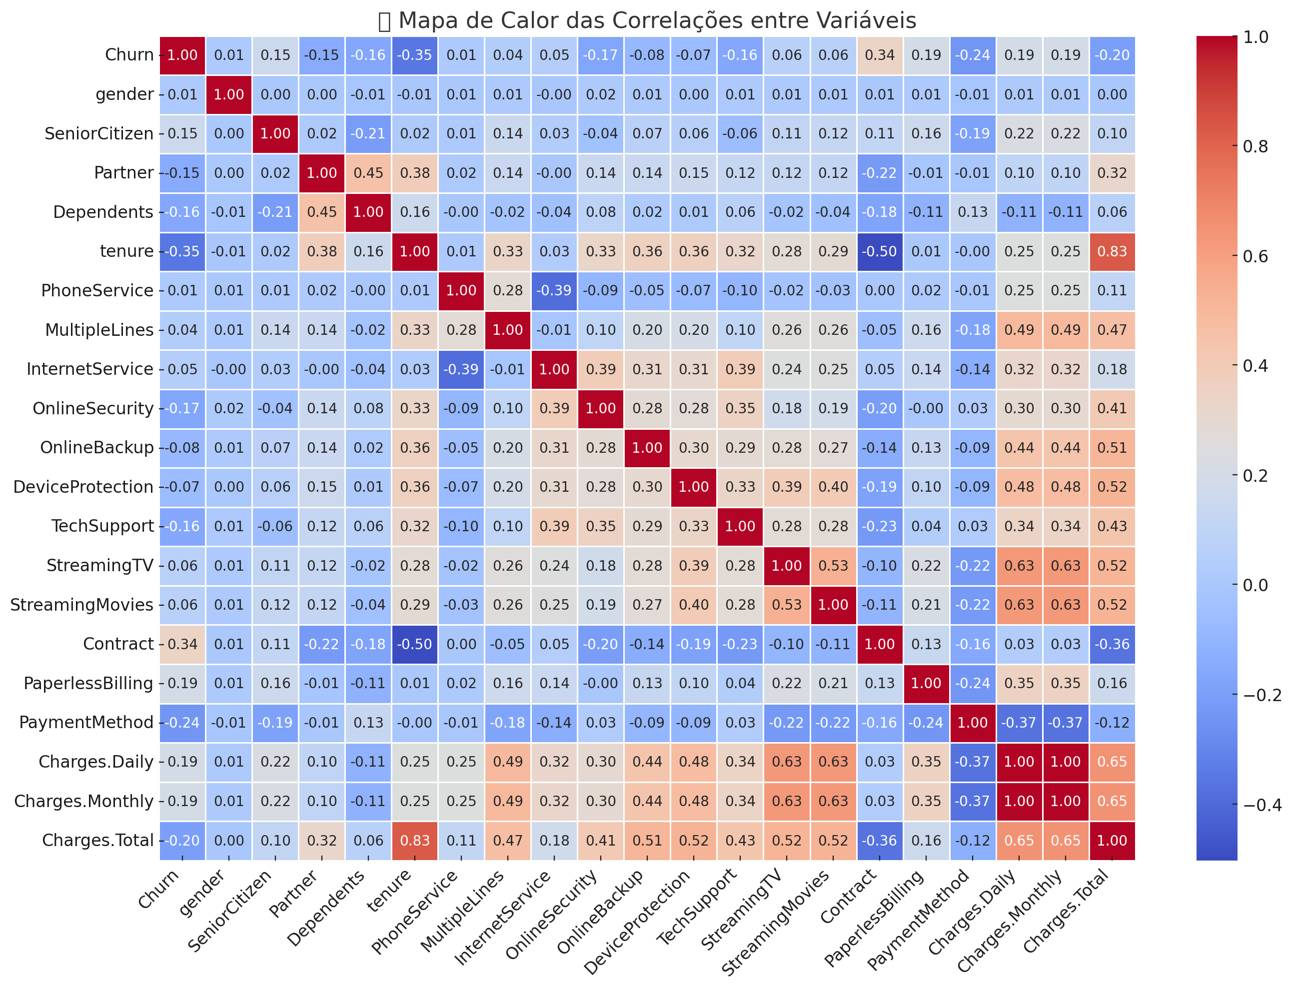

In [428]:
from PIL import Image
import io

# Carregar a imagem original
caminho_imagem = "/content/mapa de calor das correlações.png"
img = Image.open(caminho_imagem)

# Reduzir tamanho (50% da resolução original)
img_reduzida = img.resize((img.width//2, img.height//2))

# Comprimir e salvar (qualidade 70%)
buffer = io.BytesIO()
img_reduzida.save(buffer, format="JPEG", quality=70, optimize=True)
buffer.seek(0)

# Exibir no Colab
from IPython.display import Image as IPImage
IPImage(data=buffer.getvalue())

# ✅ Resultados da Análise de Correlação com Churn

---
🔥 Maiores correlações positivas com Churn (clientes que saíram):

| Variável              | Correlação |
| --------------------- | ---------- |
| 📄 `Contract`         | +0.34      |
| 💰 `Charges.Monthly`  | +0.19      |
| 💵 `Charges.Daily`    | +0.19      |
| 🧾 `PaperlessBilling` | +0.19      |
| 👵 `SeniorCitizen`    | +0.15      |

## Interpretação:

Clientes com contrato mensal, fatura eletrônica e valores mensais mais altos tendem a sair mais da empresa.

Idosos também têm maior tendência de cancelamento.

# ❄️ Maiores correlações negativas com Churn (clientes que permaneceram):

| Variável            | Correlação |
| ------------------- | ---------- |
| 🕓 `tenure`         | -0.35      |
| 💳 `PaymentMethod`  | -0.24      |
| 💸 `Charges.Total`  | -0.20      |
| 🔐 `OnlineSecurity` | -0.17      |
| 🛠️ `TechSupport`   | -0.16      |

## Interpretação:

Clientes com mais tempo de casa, que pagam via banco ou cartão, e que têm serviços extras como segurança online e suporte técnico são mais fiéis.


## ✅ 1. Cálculo das correlações relevantes com Churn
Aqui está como filtrar as variáveis com correlação forte (acima de +0.2 ou abaixo de –0.2):

In [429]:
# Correlações com Churn
correlacoes_churn = df_dados_correlacao.corr()['Churn'].sort_values(ascending=False)

# Filtrar correlações fortes (positivas e negativas)
correlacoes_fortes = correlacoes_churn[(correlacoes_churn > 0.2) | (correlacoes_churn < -0.2)]

# Exibir
print("🔍 Variáveis com maior impacto sobre o Churn (corr > 0.2 ou < -0.2):\n")
print(correlacoes_fortes)


🔍 Variáveis com maior impacto sobre o Churn (corr > 0.2 ou < -0.2):

Churn            1.000000
Contract         0.341504
PaymentMethod   -0.236320
tenure          -0.352229
Name: Churn, dtype: float64


## 📊 3. Visualização das mais relevantes

/tmp/ipython-input-430-817842930.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlacoes_fortes.values, y=correlacoes_fortes.index, palette='coolwarm')
/tmp/ipython-input-430-817842930.py:11: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


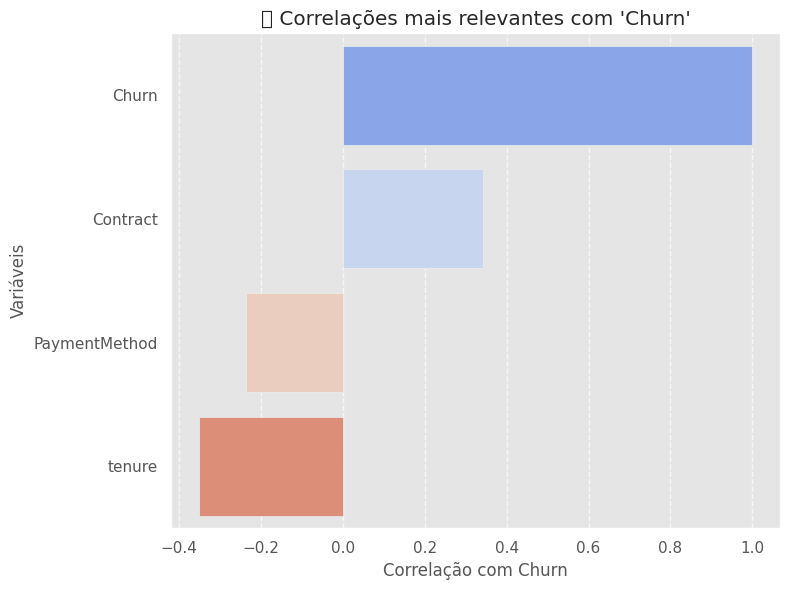

In [430]:
# Visualização gráfica
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x=correlacoes_fortes.values, y=correlacoes_fortes.index, palette='coolwarm')
plt.title("📉 Correlações mais relevantes com 'Churn'")
plt.xlabel("Correlação com Churn")
plt.ylabel("Variáveis")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 💡 Insights e Recomendações Estratégicas

1. Fidelização: Clientes com mais tempo de contrato são mais leais. Estratégias de retenção devem focar especialmente nos novos clientes (tenure baixo).

2. Serviços adicionais: Segurança online e suporte técnico estão fortemente ligados à permanência. Oferecer combos promocionais com esses serviços pode reduzir o churn.

3. Forma de pagamento: Pagamentos eletrônicos (como cartão ou transferência bancária) são associados à menor evasão. Incentive esses métodos com descontos ou bônus.

4. Cuidado com contratos mensais: Eles estão mais ligados ao churn. Ofereça vantagens para contratos anuais ou bienais.

5. Alerta de risco: Clientes com valores mensais altos e sem serviços adicionais têm mais chances de sair. Considere monitorá-los com ações preventivas.